# Self-supervised learned representations - Lab

**Submission deadline:** Friday 19.01.2024

*Points:* There are 28.5+ points. **Aim to get 20 points (i.e. 20 points = maximum grade)**. The passing grade is 10 points.

## Submission instructions:

You have two options for submission:

1. Submit your work through moodle before the deadline. For each task, you are required to describe your implementation (e.g. the operations applied to the tensors and their function, to what each dimension corresponds, etc.) through comments, and to provide a written analysis of the results. Although I will provide feedback with your grade, there is no chance of improving your work after it has been submitted.

2. Book a meeting for an online presentation [here](https://docs.google.com/spreadsheets/d/1IRAvIuoXd75AO-G9S1VS-dOrDPM97kZRyZkZwz0bK9g/edit?usp=sharing). This option has some advantages:
   * **You get extra 0.1 points** for every task presented this way.
   * No comments or written analyses are required, instead we discuss together your solutions and understanding of the topic.
   * You get feedback during the presentation and get the chance to improve your work and understanding, therefore improving your chances of having a higher score.

I provide some starter code, however, you are not required to use it as long as you properly solve the tasks. This means you can modify the code as you wish.

**Tips for a good submission**:

* Make sure you understand all the questions and answers. In case you don't understand something or you're not sure of your results/analyses, please reach out. I am always happy to help as best as I can. Even on your final submission is best to acknowledge when you are uncertain about something rather than coming up with made up explanations. I penalize being confidently wrong, but I'm totally ok with you having questions.
* Make sure that your notebook contains results (before presentation do `Runtime -> Restart and run all`).
* Use visuals, like tables and figures, to present your results. This is specially important when it comes to comparing different setups. E.g. if there is an exercise about comparing the loss curves with different hyperparameters, showing each individual loss curve in a separate cell is a bad way of visualizing it. Or even worse, just printing the losses. Instead, plot all the loss curves in a single figure with different colors for each setup. For best practices, check how scientific papers present results.
* Do not be fooled by randomness. Most of the algorithms we use involve random steps (e.g. random initialization). When you compare individual experiments, any difference that you observe might be just the effect of randomness. In order to properly assess results in such cases, you must present and analyze a few independent experiments and their statistics (e.g. average, standard deviations). This might not be feasible when we have large experiments, but most of your assignments involve experiments that take only a few minutes to run.

**Reach out to me at santiago.cuervo@lis-lab.fr for any question or issue you might encounter.**


# About the lab:

You will notice that although our lecture was mostly focused on algorithms for self-supervised learning, in this practice we will not be doing any self-supervised training (except language modeling, which you already did with GPT in the last lab). This is because self-supervised training usually requires large models and large amounts of data. So, in order not to be limited by compute or to be waiting for hours just to see if your solution gives the expected output, we will focus on analyzing and using the representations learned by already trained self-supervised models. This is, as a matter of fact, what we most often do in practice: we take a self-supervised pre-trained model (termed backbone) and use it to extract representations that we use as input to a much simpler model to solve our problem of interest. Since self-supervised learning excels at mining useful information, the obtained representations are useful for many applications.


# Problem 1: Word embeddings [4p]

Natural language processing tasks with deep neural networks require continuous representations for text.
[Word embeddings](https://en.wikipedia.org/wiki/Word_embedding) are mappings from a discrete
space (characters, subwords, words, etc.) to real-valued vectors. Word embeddings are learned either as a by-product of training on other tasks (e.g., language modeling, neural machine translation), or with networks designed specifically for the word embedding task.

One of the most popular architectures for training word embeddings is called [Word2vec](https://arxiv.org/abs/1301.3781). It builds on the idea that semantics (meaning) of a word can be defined through the contexts in which the word appears in the sentence (notice that this is the core idea behind self-supervised learning by prediction).

Let $w_1, w_2,\ldots,w_N$ be an $N$-word sentence in a natural language.
We define a context of a word $w_l$ a list of $n$ preceeding and following words
$w_{l-n},\ldots,w_{l-1},w_{l+1},\dots,w_{l+n}$. In word2vec we project each word $w$ linearly to obtain a vector that is the word representation $z$. Then we can do two things:

1. Predict a word based on its context (_Continuous Bag of Words (CBOW)_): we set the word $w_l$ as target and use the sum of the vectors corresponding to the context as input: x = $\sum_{i \in \{-n, \ldots, -1, +1, \ldots, n\}} z_i$. Then we pass this input through a softmax layer and train the model to predict the target word using a cross-entropy loss.

2. Predict the context based on the word (_Skip-grams_): we use the vector $z_l$ representing the word $w_l$ as input and use it to create training samples in which the context words are the target: $(z_l, w_{l-n}),\ldots,(z_l, w_{l-1}),(z_l, w_{l+1}),\ldots,(z_l, w_{l+n})$. As before, we pass the inputs through a softmax layer to predict the target and train the model using a cross-entropy loss.

![image.png](https://drive.google.com/uc?id=150F7dnPS8rfr1n3CUYwxEJ4cSFdSlFJa)

For a great explanation with more details on word2vec I suggest reading [the illustrated word2vec](https://jalammar.github.io/illustrated-word2vec/).

The underlying assumption in word2vec is that similar words appear in similar contexts.
For instance, words *Poland* and *Monaco* are similar in a sense, that they are singular nouns
describing abstract concepts of existing, european countries.
We can convince ourselves by looking at excerpts from Wikipedia articles
on Poland and Monaco:

* Despite **Monaco's independence** and separate foreign policy
* aimed to preserve **Poland's independence** and the szlachta's

* **Monaco joined the** Council of Europe in 2004
* **Poland joined the** Schengen Area in 2007

* nearly one-fifth **of Poland's population** – half of them
* Christians comprise a total of 83.2% **of Monaco's population**.

### Tasks
You will use word vectors pre-computed on a large dataset.
1. **(1 pt)** It has been observed that word embeddings allow to perform semantic arithmetic where, for instance

    **king** - **man** + **woman** ~= **queen**

    This *analogy* task is often used as a quality measure of word embeddings and showcases the importance of representation learning: words get mapped to a high-dimensional real vector space where things such as distances and  angles between vectors represent meaningful relations between concepts. Afterwards, by performing vector operations on that space, our models are capable of "reasoning" about concepts.
    
    In this exercise you will load word embeddings and compute their analogy score on a dataset of analogous pairs, expressed as an accuracy of predicting a paired item (**queen** in the example above).
    
2. **(1 pt)** Word embedding capture approximate semantics. Under an assumption that words of similar semantics
    exist in different languages, a mapping $W: \mathbb{R}^{100}\mapsto\mathbb{R}^{100}$ (our embeddings for this task are of dimension 100) might be constructed that
    translates word embeddings between languages. [It has been shown](https://arxiv.org/abs/1309.4168) that such ortonormal mappings allow to express
    approximate, bilingual dictionaries. In addition, non-linear mappings do not offer additional benefit.

    Given a simple English-French dictionary of word pairs
    find an orthonormal mapping $W$ between English and French word embeddings using Procrustes analysis (the name sounds scary, but this part is done for you).

3. **(2 pt)** Word embeddings can often be nicely visualized.

    3.1 **(1 pt)** Make a 2-D `PCA` plot of word embeddings for countries and their capital cities. Connect each country with its capital city with a line segment. Can you see any regularities?
    
    3.2 **(1 pt)** Plot 400 roughly most frequent words' embeddings in 2-D with `PCA`. Skip stop words, punctuations, artifact words, etc. You can be imprecise and use heuristics (e.g., select words than are at lest 3 charactes long). Can you see any regularities? Another method of making meaningful visualizations is `t-SNE`. Make another 2-D visualization, this time using `t-SNE`. Visualizations with `t-SNE` are obtained with gradient descent. Try to tweak optimization parameters to get lower optimization error, than the one with default parameters. Can you see any regularities this time?

In [1]:
!pip install gdown==v4.6.3


  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [2]:
# Modules needed for this problem
import numpy as np
import collections
import pickle
from scipy.linalg import orthogonal_procrustes
import tabulate
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pprint
import sklearn.feature_extraction
from termcolor import colored
import codecs
import nltk
from tqdm.notebook import tqdm


We first download the data and models needed:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
!pip install -q gdown httpimport

![ -e word2vec_en_fr.pkl ] || gdown 'https://drive.google.com/uc?id=1-EH3LJvP9ttAgiiNuq3ay_SmK6N9pGUM' -O word2vec_en_fr.pkl
![ -e questions_words.txt ] || gdown 'https://drive.google.com/uc?id=1Ia64QKg6x-vmjwDbWWJ5qxRxamWU1sbz' -O questions_words.txt
![ -e dict_en_fr.pkl ] || gdown 'https://drive.google.com/uc?id=112NnNp_BTlb9y8baUhv8n-qX2cd8FT_t' -O dict_en_fr.pkl
![ -e countries_capitals ] || gdown 'https://drive.google.com/uc?id=1ZTCuBZBnWZvgtBH7InhHRSLXW_I6mlp3' -O countries_capitals

Downloading...
From: https://drive.google.com/uc?id=1-EH3LJvP9ttAgiiNuq3ay_SmK6N9pGUM
To: /content/word2vec_en_fr.pkl
100% 2.92G/2.92G [00:36<00:00, 79.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ia64QKg6x-vmjwDbWWJ5qxRxamWU1sbz
To: /content/questions_words.txt
100% 604k/604k [00:00<00:00, 127MB/s]
Downloading...
From: https://drive.google.com/uc?id=112NnNp_BTlb9y8baUhv8n-qX2cd8FT_t
To: /content/dict_en_fr.pkl
100% 18.4k/18.4k [00:00<00:00, 44.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZTCuBZBnWZvgtBH7InhHRSLXW_I6mlp3
To: /content/countries_capitals
100% 4.70k/4.70k [00:00<00:00, 18.9MB/s]


In [5]:
# Word embeddings assign a vector to each word. To use them we need three things:
# 1. the embeddings themselves
# 2. a dictionary from words to their embedding ids
# 3. an inverse dictionary

Embedding = collections.namedtuple(
    'Embedding',
    ['vec', 'word2idx', 'idx2word'])

"""Load dicts with the embeddings and vocab"""
with open('word2vec_en_fr.pkl', 'rb') as pickle_file:
    loaded_dict = pickle.load(pickle_file)

def make_word2vec(lang_dict):
    vec = lang_dict["embeddings"]
    idx2word = lang_dict["vocab"]
    word2idx = {w:i for (i,w) in enumerate(idx2word)}
    return Embedding(vec, word2idx, idx2word)


word2vec_en = make_word2vec(loaded_dict["en"])
word2vec_fr = make_word2vec(loaded_dict["fr"])


def load_analogies():
    '''Load tuples of analogies, e.g., (man, woman, king, queen)'''
    questions_path = 'questions_words.txt'
    analogies = [l.strip().split() for l in open(questions_path, 'r') \
                 if not l.startswith(':')]
    return analogies

## Problem 1, Task 1: Analogies

In [6]:
def eval_analogies(vecs, analogies):
    """
    Compute the accuracy on the analogy task.

    In the task, quadruples of words are given (q1, q2, r1, r2).
    The words q1 and q2 are bound by a relation. The words r1 and r2
    are bound by the same relation. The task is to predict r2 knowing words
    q1, q2, and r1.

    Example:
    Quadruple [King, Queen, Man, Woman] yields the question
    King is to Queen as Man is to ????

    Args:
        word_vecs: Embeddings tupes
        analogies: list of quadruples: (q1, q2, r1, r2)

    Returns:
        percentage of correct answers
    """
    indexes = [[vecs.word2idx.get(w, None) for w in tupl] \
                for tupl in analogies]
    indexes = [tupl for tupl in indexes \
               if all([v is not None for v in tupl])]
    # indexes holds quadruples of ints giving the ids of words from our vocab.
    indexes = np.asarray(indexes)
    print('Got vocab for %d/%d pairs' % (indexes.shape[0], len(analogies)))

    # Extract the vectors for the query words
    q1 = vecs.vec[indexes[:, 0]]
    q2 = vecs.vec[indexes[:, 1]]
    r1 = vecs.vec[indexes[:, 2]]

    # Extractr the word IDs for the correct answers
    r2_inds = indexes[:, 3]

    #
    # TODO
    #
    # Compute the approximate location of word r2 as r2 = r1 + (q2 - q1)
    # Find the word closest to this location using cosine distance.
    # Return it's id and compute the accurracy.
    #

    r2_pred = r1 + (q2-q1)

    # Normalize length and compute dot product between r2_pred and word_vecs
    # to get cosine distance
    r2_pred_norm = r2_pred / np.sqrt((r2_pred ** 2).sum(axis=1))[:, np.newaxis]
    vecs_norm = vecs.vec / np.sqrt((vecs.vec ** 2).sum(axis=1))[:, np.newaxis]

    # Compute in chunks to save memory
    r2_pred_inds = np.concatenate([np.argmax(r2_pred_norm[i:i+1000].dot(vecs_norm.T), axis=1) \
                                   for i in range(0, r2_pred.shape[0], 1000)])
    return 100.0 * (r2_pred_inds == r2_inds).sum() / r2_inds.shape[0]

In [7]:
# Load analogy tuples, e.g., (man, woman, king, queen)
analogies = load_analogies()

# Some are uppercased geographical names
analogies_lower = [[w.lower() for w in tupl] for tupl in analogies]

print(analogies[0])
print(analogies_lower[0])

['Athens', 'Greece', 'Baghdad', 'Iraq']
['athens', 'greece', 'baghdad', 'iraq']


In [8]:
print('\nWord2vec analogy task accuracy:')
print('-------------------------------')
# Word2vec has case information
print(eval_analogies(word2vec_en, analogies), '% correct')


Word2vec analogy task accuracy:
-------------------------------
Got vocab for 9378/19544 pairs
20.814672638089146 % correct


***The accuracy is very good based on the randoomness of the classes we expect that it should be 1 /19544 and it went very well with 20.81%***

## Problem 1, Task 2: Translation through alignment of embedding spaces

In [9]:
# Load a simple dict of English, French word pairs
with open('dict_en_fr.pkl', 'rb') as pickle_file:
    en_fr = pickle.load(pickle_file)
# Keep those, for which we have embeddings
en_fr = {en:fr for (en,fr) in en_fr.items() \
         if en in word2vec_en.word2idx and fr in word2vec_fr.word2idx}
print('Dictionary size:', len(en_fr))
print('good --', en_fr['good'])

Dictionary size: 908
good -- bien


In [10]:
# Select word embeddings for dictionary words
en_words = sorted(en_fr.keys())
V_en = word2vec_en.vec[[word2vec_en.word2idx[w] for w in en_words]]
V_fr = word2vec_fr.vec[[word2vec_fr.word2idx[en_fr[w]] for w in en_words]]
print(V_en.shape, V_fr.shape)

(908, 100) (908, 100)


In [11]:
# Find an orthogonal transformation from V_en to V_fr.
# which minimizes square reconstruction error
W = orthogonal_procrustes(V_en, V_fr)[0]

In [12]:
def translate(W, v, vecs2):
    """
    Translate a word vector from one space to another and find the closest word.

    Args:
        W: Transformation matrix
        v: Source word vector
        vecs2: Target word embeddings object (assuming it has vec and idx2word attributes)

    Returns:
        Closest word in the target space
    """
    # Transform source word vector v using W to get a location in the target space
    v_transformed_norm = np.dot(v, W)

    # Normalize the transformed vector
    #v_transformed_norm = v_transformed / np.sqrt(np.sum(v_transformed ** 2))
    vecs2_norm = vecs2.vec / np.sqrt(np.sum(vecs2.vec ** 2, axis=1, keepdims=True))

    # Compute cosine similarity with vectors in the target space
    # Compute in chunks to save memory
    chunk_size = 1000
    similarities = np.concatenate([
        np.dot(v_transformed_norm, vecs2_norm[i:i + chunk_size].T)
        for i in range(0, vecs2.vec.shape[0], chunk_size)
    ])

    # Find the index of the closest word in the target space
    idx = np.argmax(similarities)

    return vecs2.idx2word[idx]

# Assuming you have the necessary libraries imported
import tabulate

# Example usage
tr_words = [i for i in np.random.randint(1000, 2000, 100) if word2vec_en.idx2word[i] not in en_fr]
tr_words = tr_words[:20]

rows = [[word2vec_en.idx2word[i], translate(W, word2vec_en.vec[i], word2vec_fr)] for i in tr_words]
print(tabulate.tabulate(rows))

----------  ------------
catholic    catholique
charge      contrepartie
patient     patient
dc          dc
internal    externe
gear        moto
boys        garçons
beauty      beauté
serious     sérieux
wed         ven
del         barrio
films       films
recommend   conseillerai
resolution  résolution
iron        tonneau
urban       urbaine
dvd         dvd
weather     météo
recommend   conseillerai
camp        camp
----------  ------------


## Problem 1, Task 3: Visualizing the embedding space

### Task 3.1 : Finding geometric regularities

In [13]:
capitals = [l.strip().split('\t') for l in codecs.open('countries_capitals', 'r', 'utf-8')]
capitals = {country.lower():capital.lower() for (country,capital) in capitals}

# Select those present in Word2vec vocab
capitals = {k:v for (k,v) in capitals.items() \
            if k in word2vec_en.word2idx and v in word2vec_en.word2idx}

# Flatten the array to have a list of [country, capital, country, capital, ...]
geo = [e for pair in capitals.items() for e in pair]
print(len(geo) // 2, 'pairs', geo[:6])

127 pairs ['afghanistan', 'kabul', 'albania', 'tirana', 'algeria', 'algiers']


In [14]:
geo_inds = [word2vec_en.word2idx[w] for w in geo]
geo_vecs = word2vec_en.vec[geo_inds]
print(geo_vecs.shape)

(254, 100)


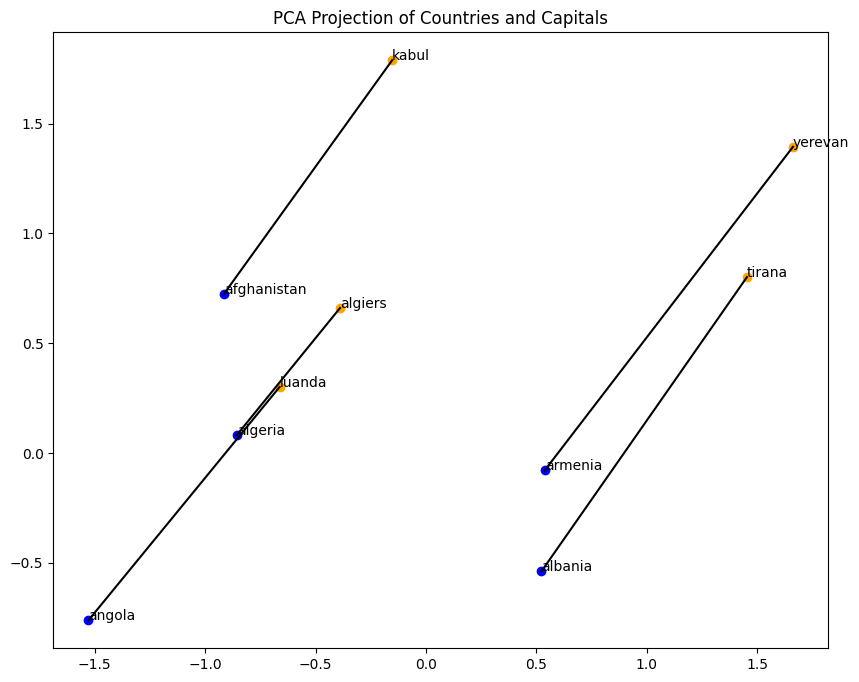

In [15]:
#
# TODO
# use PCA from sklearn.decomposition to project the countries and capitals into 2D.
from sklearn.decomposition import PCA

# draw lines connecting each country with its capital
#
# Hint:
# - the function "annotate" can be used to put text onto the plot
pca = PCA(n_components=2)
geo_vecs_2d = pca.fit_transform(geo_vecs)

# Plot the points
plt.figure(figsize=(10, 8))
plt.scatter(geo_vecs_2d[0:10:2, 0], geo_vecs_2d[0:10:2, 1], color='blue')
plt.scatter(geo_vecs_2d[1:10:2, 0], geo_vecs_2d[1:10:2, 1], color='orange')
# Draw lines connecting each country with its capital
for i in range(0, 10, 2):
    plt.plot([geo_vecs_2d[i, 0], geo_vecs_2d[i + 1, 0]], [geo_vecs_2d[i, 1], geo_vecs_2d[i + 1, 1]], color = 'black')

# Annotate each point with its corresponding country/capital
for i, txt in enumerate(geo[:10]):
    plt.annotate(txt, (geo_vecs_2d[i, 0], geo_vecs_2d[i, 1]))

plt.title('PCA Projection of Countries and Capitals')
plt.show()

#


***We use the equation King — man + woman = queen, which is one of the most famous word2vec arithmetic representing the hidden algebraic structure of words. Thus to get the country of a capital city, we use a similar equation, Country2 = Capital1 — Country1 + Capital2 and implement it mathematically using word embedding and similarity function***

### Task 3.2 Visualizing meaningful clusters

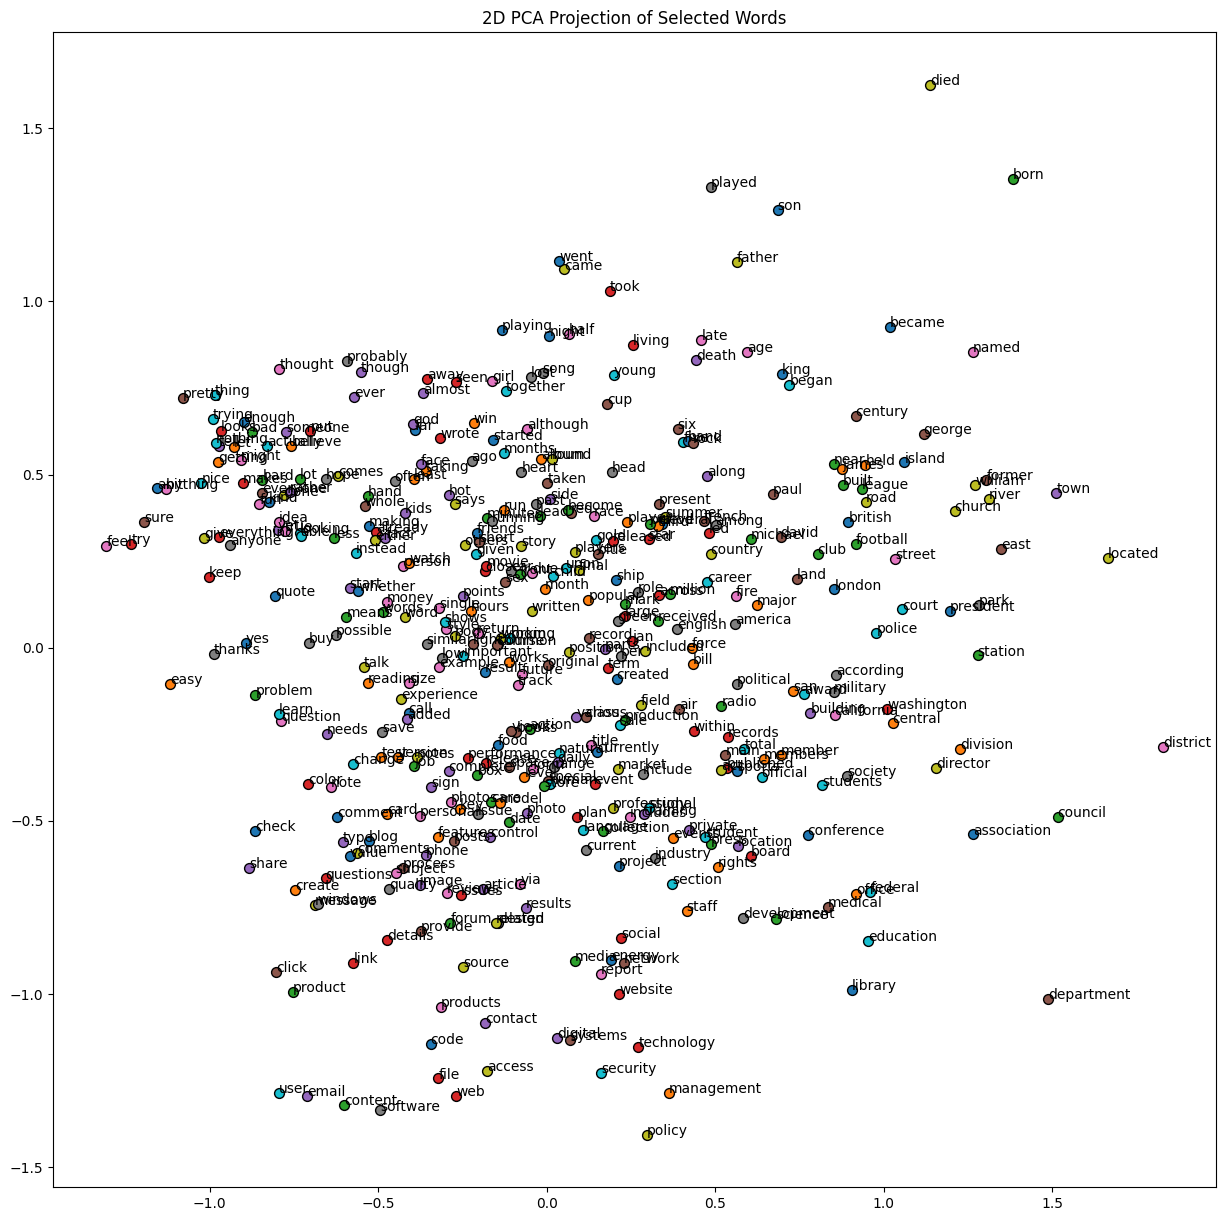

In [16]:
# Select words starting from the 200th to ommit stop words,
# which have at least 3 chars
top_words = [w for (i,w) in enumerate(word2vec_en.idx2word) \
             if i > 200 and len(w) >= 3][:400]
top_inds = [word2vec_en.word2idx[w] for w in top_words]
#
# TODO: make a 2D PCA projection of the selected words.
#
word_vecs = word2vec_en.vec[top_inds]

pca = PCA(n_components=2)
word_vecs2D = pca.fit_transform(word_vecs)

plt.figure(figsize=(15,15))

for i,t in enumerate(word_vecs2D):
  x, y = t
  plt.scatter(x, y, edgecolors='black', s=50)
  plt.annotate(top_words[i], xy=(x,y))
plt.title('2D PCA Projection of Selected Words')
plt.show()

***The word vectors for 'user', 'email' and 'software' appear related to each other, because their vectors are close to each other. Similarly, 'went', 'came' and 'took' all express emotions, and are also near each other.***

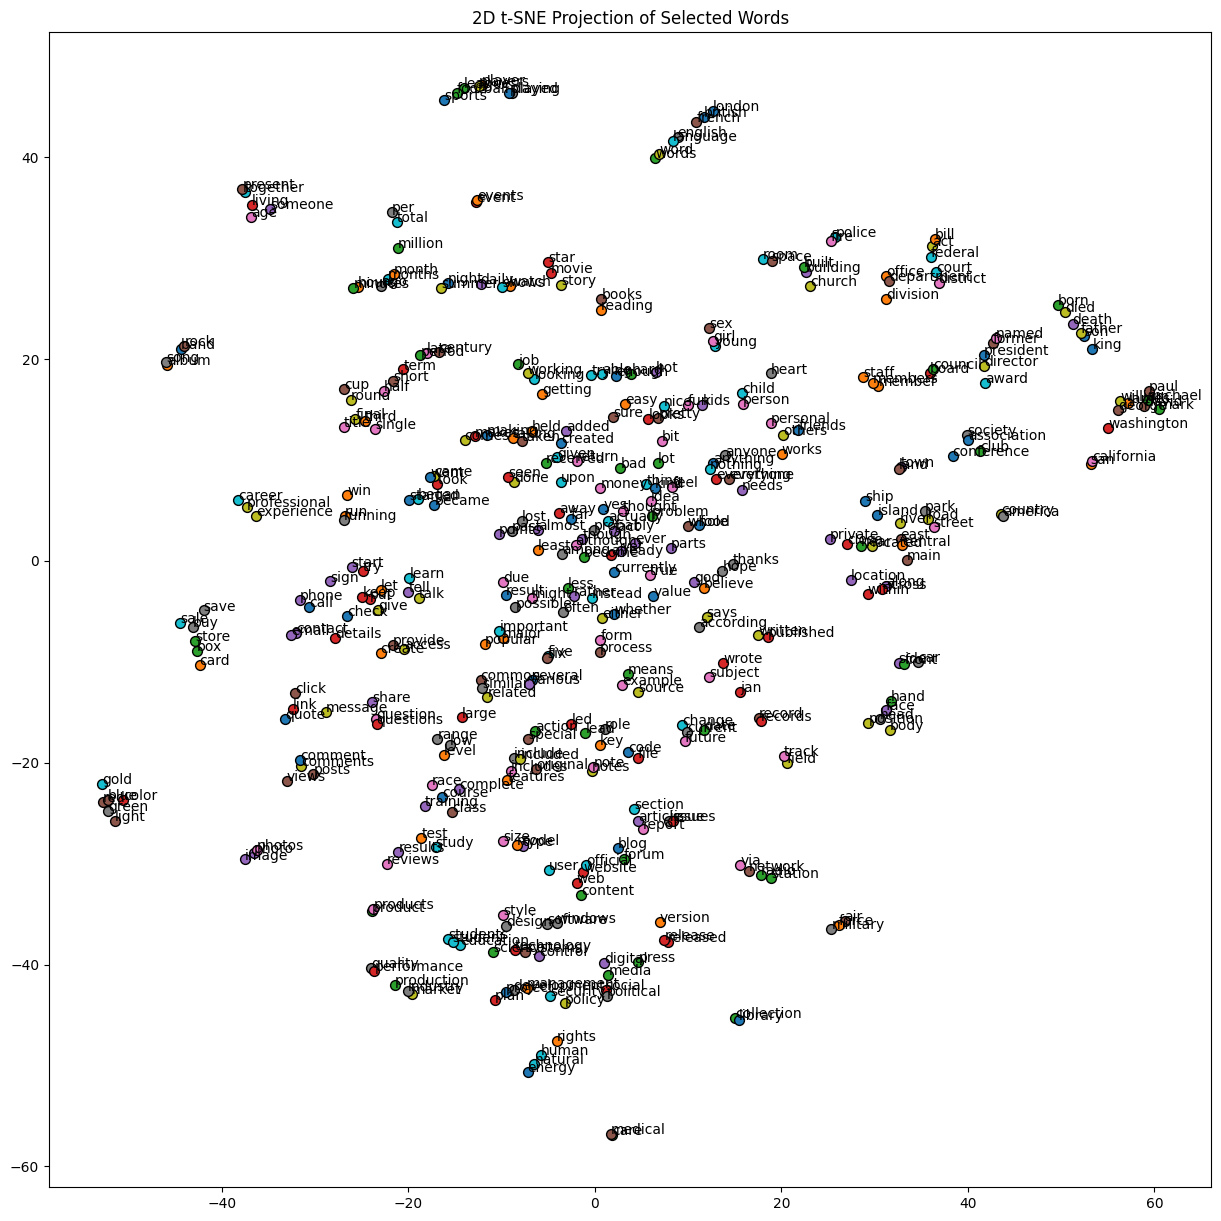

In [17]:
from sklearn.manifold import TSNE
# TODO: make a 2D t-SNE projection of the selected words.
# Things will cluster much nicer
#
tsne = TSNE(n_components=2, perplexity=5, learning_rate=10)
word_vecs2D = tsne.fit_transform(word_vecs)

plt.figure(figsize=(15,15))

for i,t in enumerate(word_vecs2D):
  x, y = t
  plt.scatter(x, y, edgecolors='black', s=50)
  plt.annotate(top_words[i], xy=(x,y))
plt.title('2D t-SNE Projection of Selected Words')
plt.show()

Cluster 1 / 3


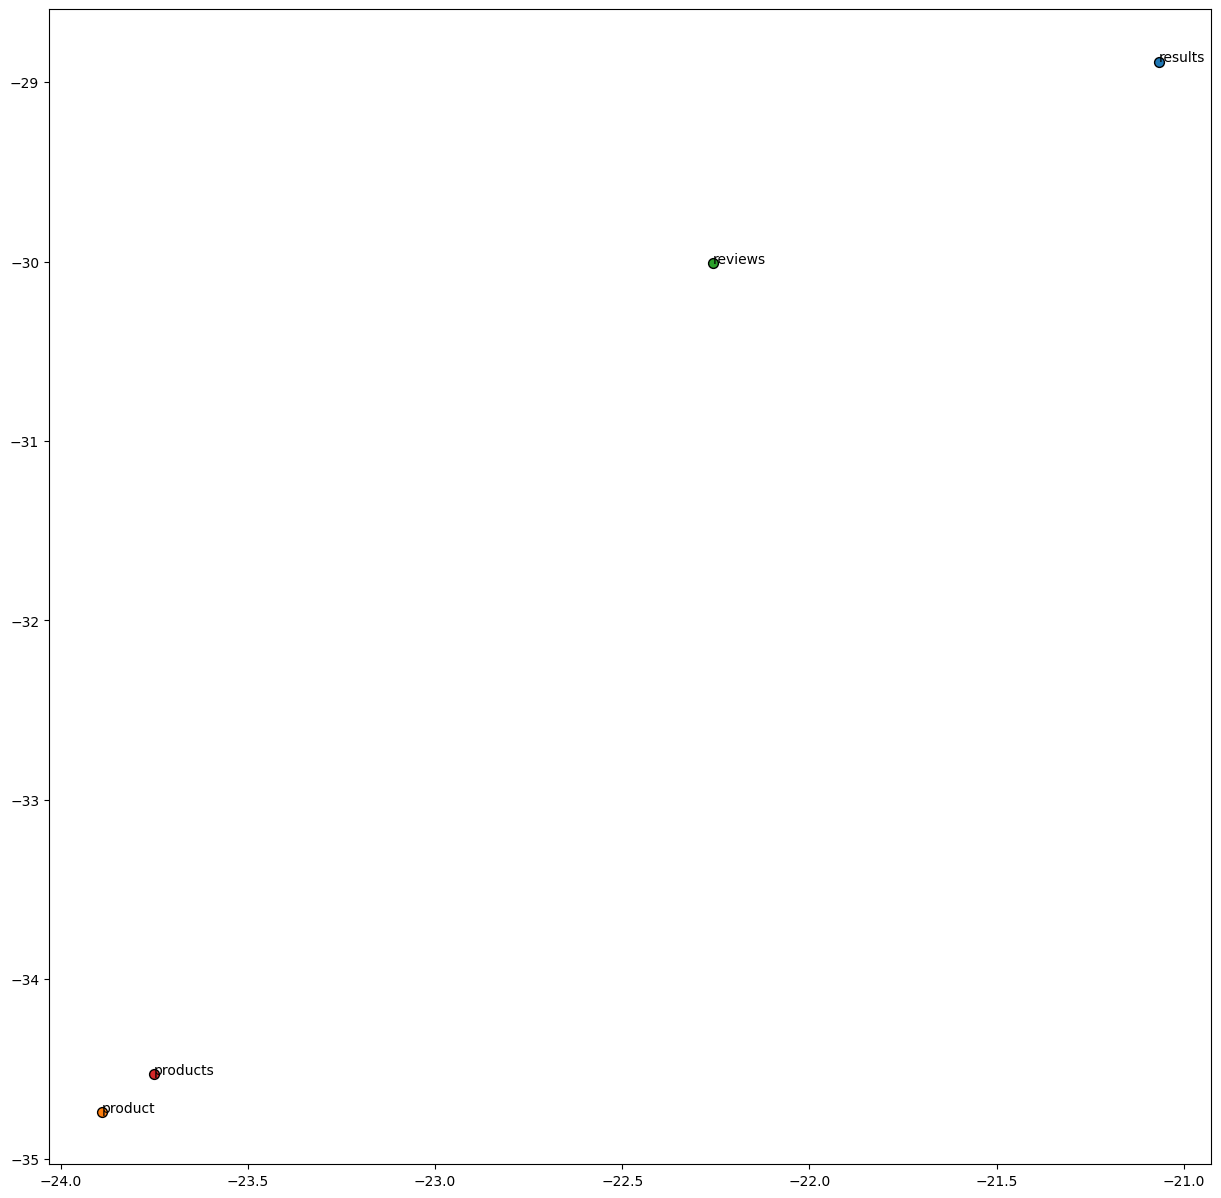

Cluster 2 / 3


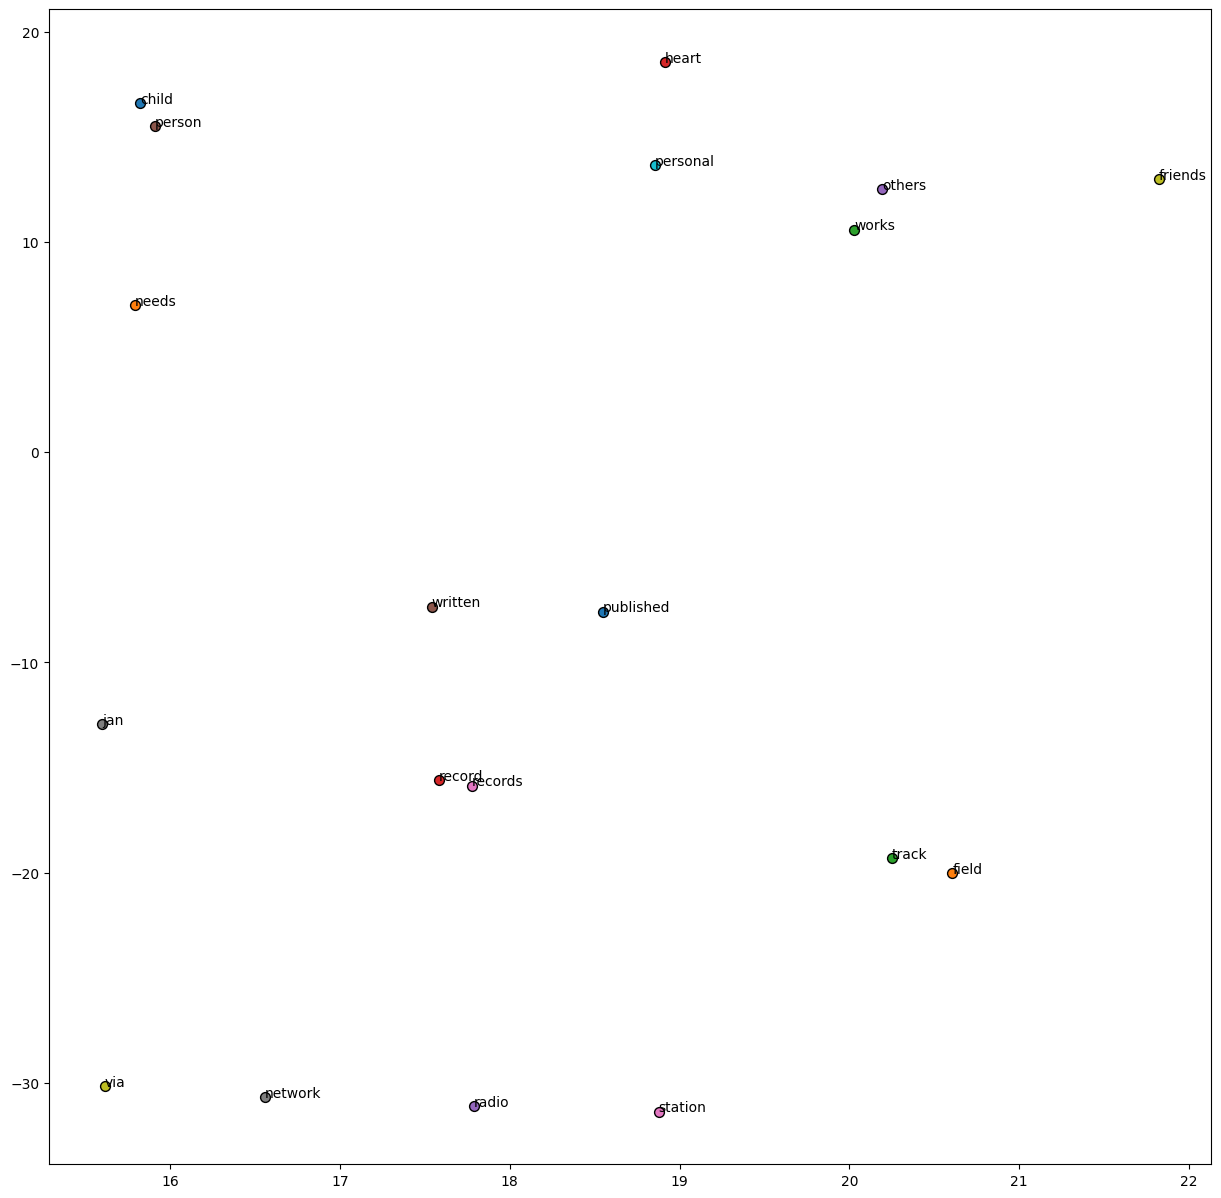

Cluster 3 / 3


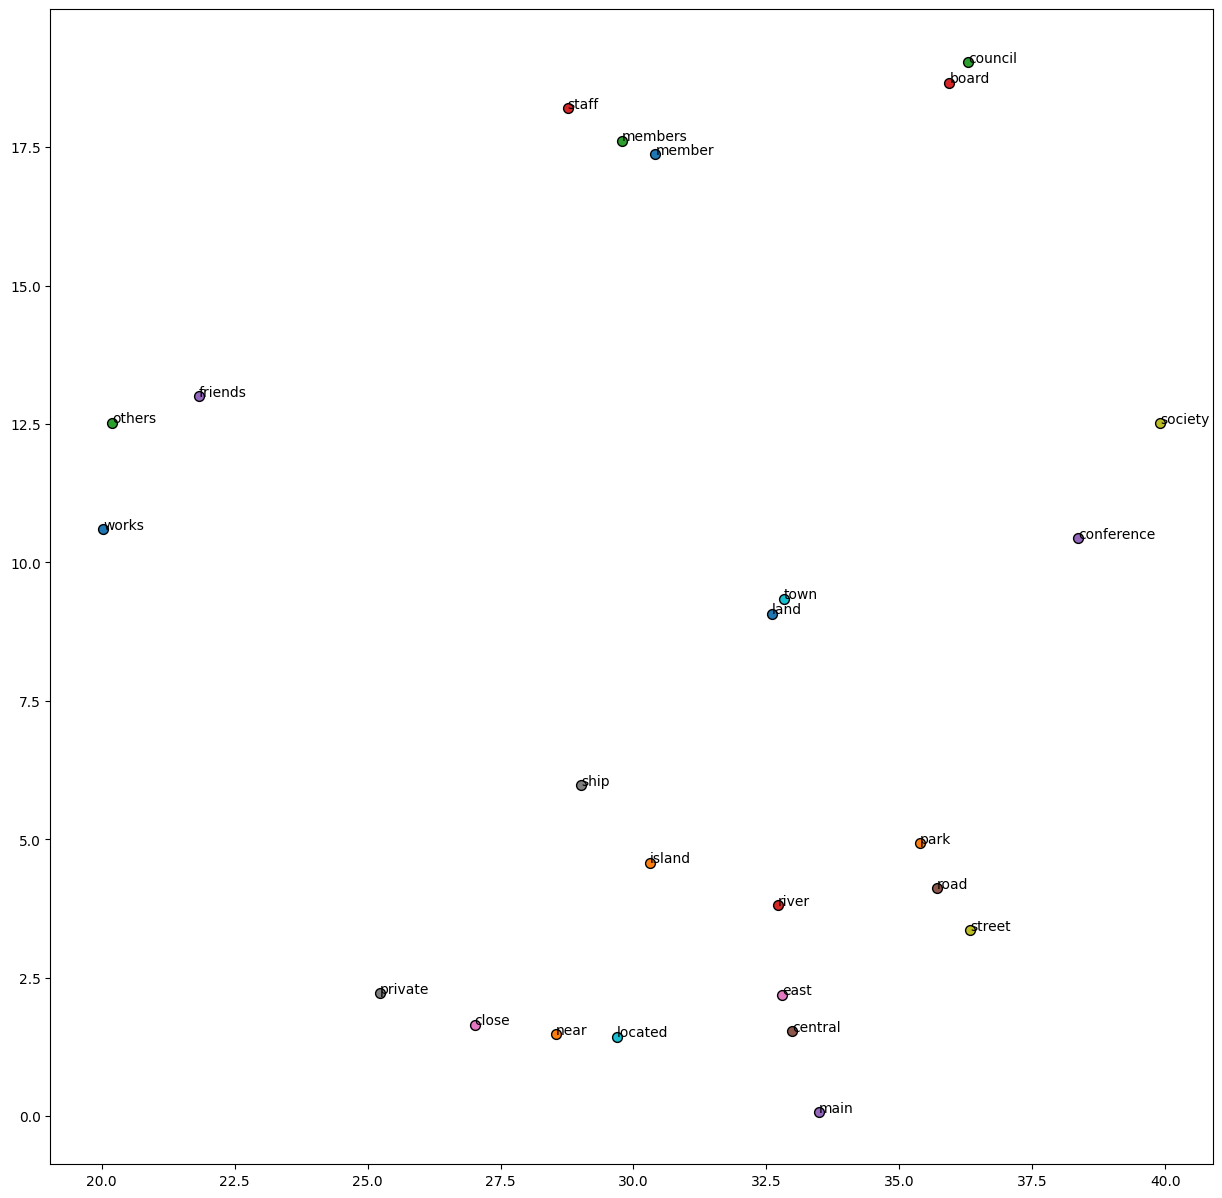

In [18]:
# TODO: plot and zomm in on 3 meaningful clusters
Xls = [-25, 15, 20]
Xrs = [-20, 25, 40]

Yls = [-40, -40, 0]
Yrs = [-20, 20, 20]

for k in range(len(Xls)):
  print(f'Cluster {k + 1} / {len(Xls)}')
  plt.figure(figsize=(15, 15))
  for i, t in enumerate(word_vecs2D):
    x, y = t
    if Xls[k] <= x <= Xrs[k] and Yls[k] <= y <= Yrs[k]:
      plt.scatter(x, y, edgecolors='black', s=50)
      plt.annotate(top_words[i], xy=(x, y))

  plt.show()

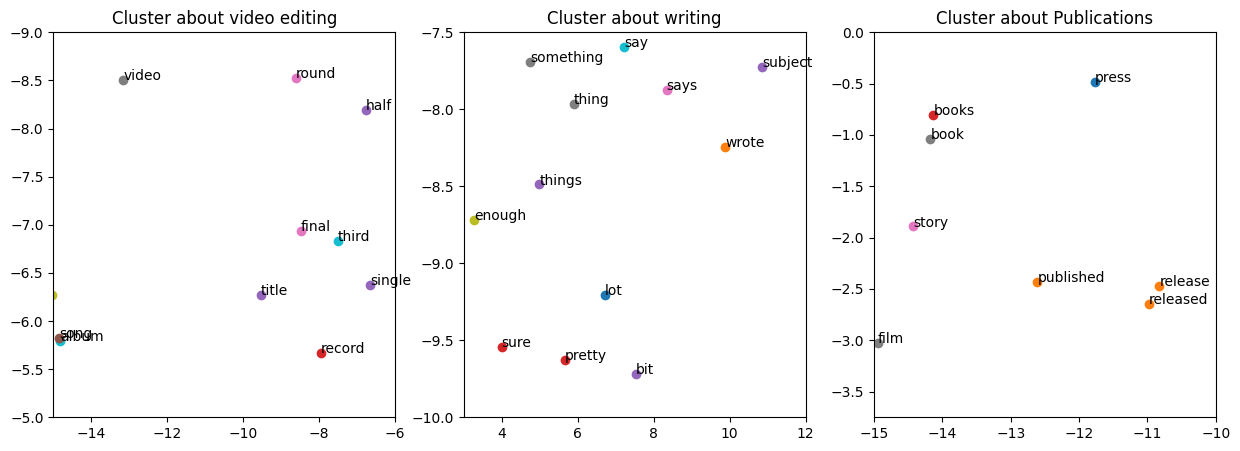

In [19]:
# TODO: plot and zomm in on 3 meaningful clusters
# Select words starting from the 100th to ommit stop words,
# which have at least 3 chars
top_words = [w for (i,w) in enumerate(word2vec_en.idx2word) \
             if i > 100 and len(w) >= 3][:400]
top_inds = [word2vec_en.word2idx[w] for w in top_words]
#
# TODO: make a 2D t-SNE projection of the selected words.
selected_vecs = word2vec_en.vec[top_inds]
# Use PCA to project countries and capitals into 2D
tsne = TSNE(n_components=2, random_state=42)
selected_vecs_2d = tsne.fit_transform(selected_vecs)
#
# Annotate each point with the corresponding word

f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15, 5))
for i, word in enumerate(top_words):
    ax1.scatter(selected_vecs_2d[i, 0], selected_vecs_2d[i, 1])
    ax1.annotate(word,(selected_vecs_2d[i, 0], selected_vecs_2d[i, 1]))

ax1.set_xlim([-15, -6])
ax1.set_ylim([-5,-9])
ax1.set_title('Cluster about video editing')

for i, word in enumerate(top_words):
    ax2.scatter(selected_vecs_2d[i, 0], selected_vecs_2d[i, 1])
    ax2.annotate(word,(selected_vecs_2d[i, 0], selected_vecs_2d[i, 1]))

ax2.set_xlim([3, 12])
ax2.set_ylim([-10,-7.5])
ax2.set_title('Cluster about writing')


for i, word in enumerate(top_words):
    ax3.scatter(selected_vecs_2d[i, 0], selected_vecs_2d[i, 1])
    ax3.annotate(word,(selected_vecs_2d[i, 0], selected_vecs_2d[i, 1]))

ax3.set_xlim([-15, -10])
ax3.set_ylim([-3.75,0])
ax3.set_title('Cluster about Publications')
plt.show()

# ***Now I will change the parameters of clustering***

# Perplexity

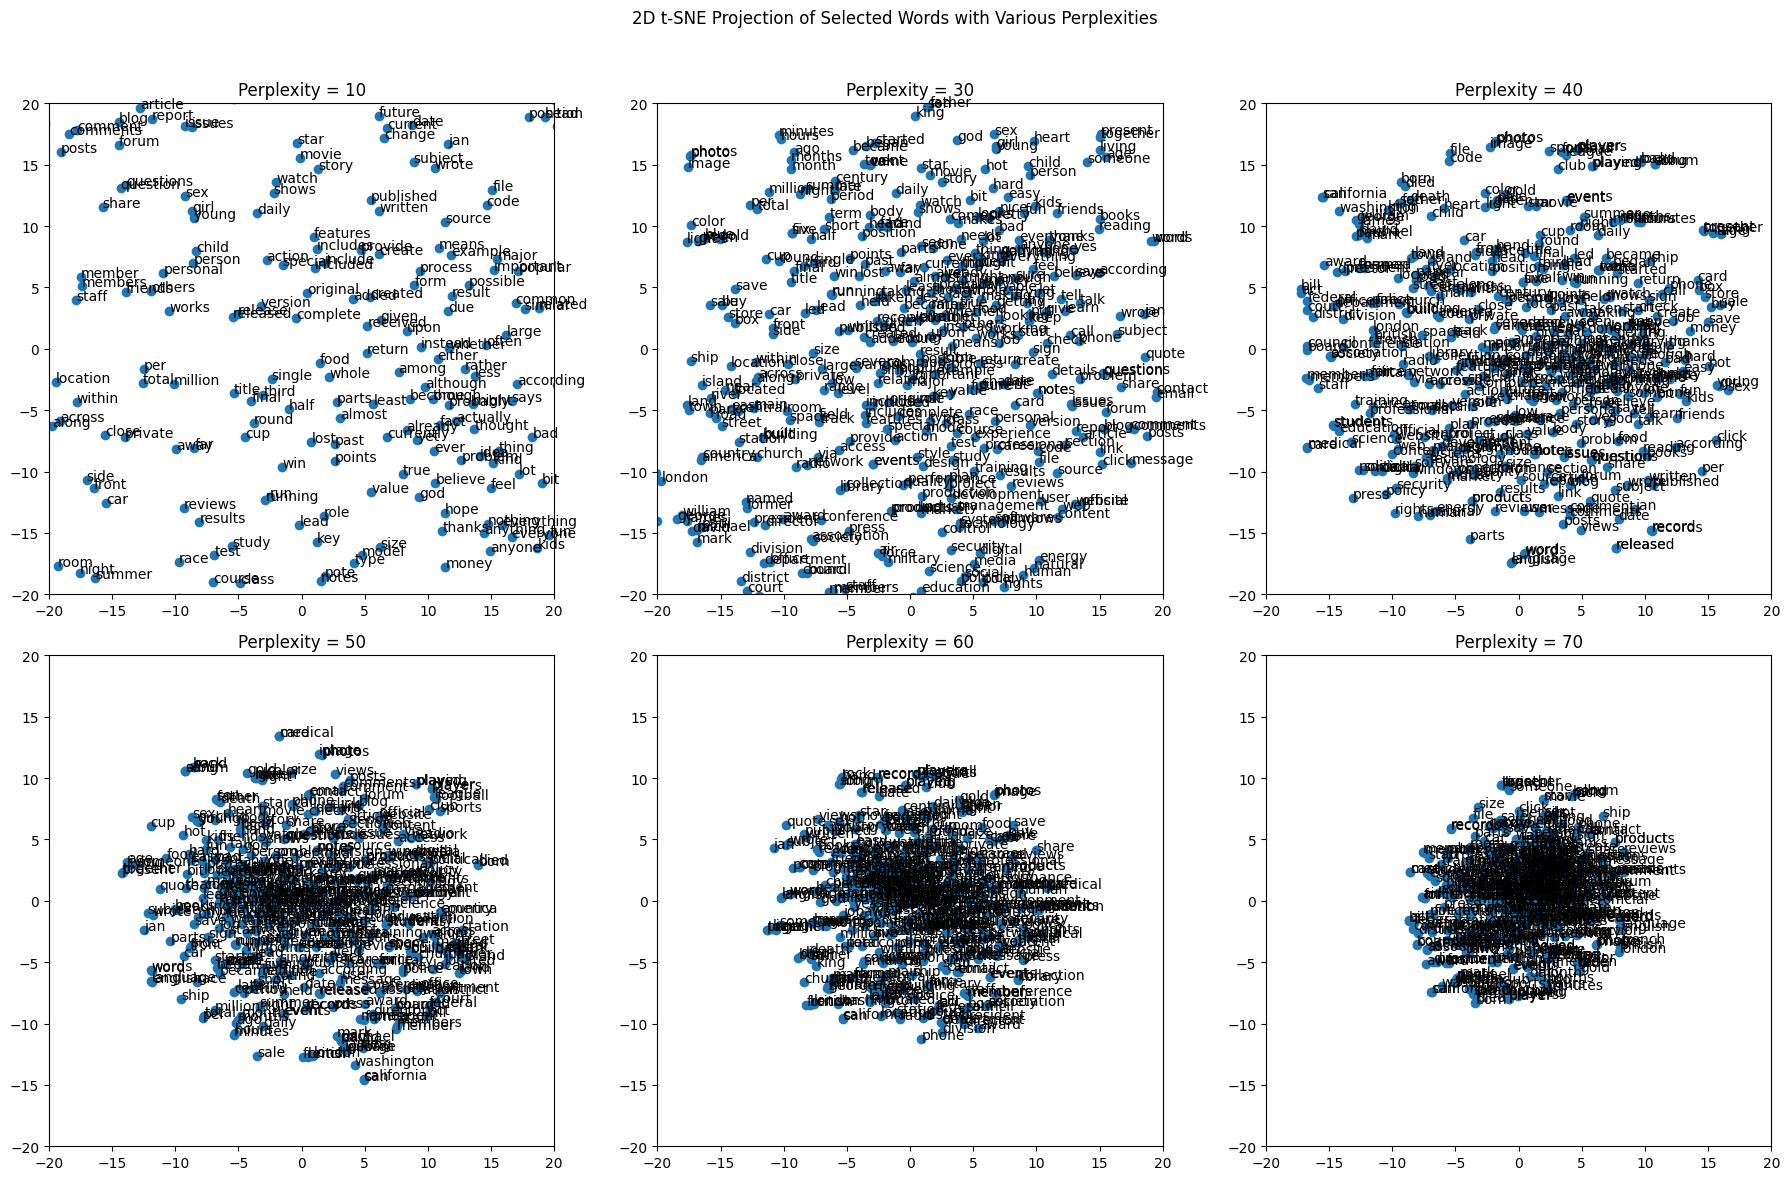

In [20]:
top_words = [w for (i,w) in enumerate(word2vec_en.idx2word)
             if i > 200 and len(w) >= 3][:400]
top_inds = [word2vec_en.word2idx[w] for w in top_words]

perplexities = [10, 30, 40, 50, 60, 70]  # Updated perplexity values
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjusted for 6 subplots

for i, perplexity in enumerate(perplexities):
    # Use PCA to project countries and capitals into 2D
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    selected_vecs_2d = tsne.fit_transform(word2vec_en.vec[top_inds])

    # Plot the t-SNE projection
    ax = axes[i // 3, i % 3]  # Adjusted for 2 rows x 3 columns
    ax.scatter(selected_vecs_2d[:, 0], selected_vecs_2d[:, 1])

    # Annotate each point with the corresponding word
    for j, word in enumerate(top_words):
        ax.annotate(word, (selected_vecs_2d[j, 0], selected_vecs_2d[j, 1]))

    ax.set_title(f'Perplexity = {perplexity}')
    ax.set_xlim([-20, 20])
    ax.set_ylim([-20, 20])

plt.suptitle('2D t-SNE Projection of Selected Words with Various Perplexities')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the subplot layout
plt.show()


# Changing( Learning Rate and Number of iterations)

<Figure size 1200x1000 with 0 Axes>

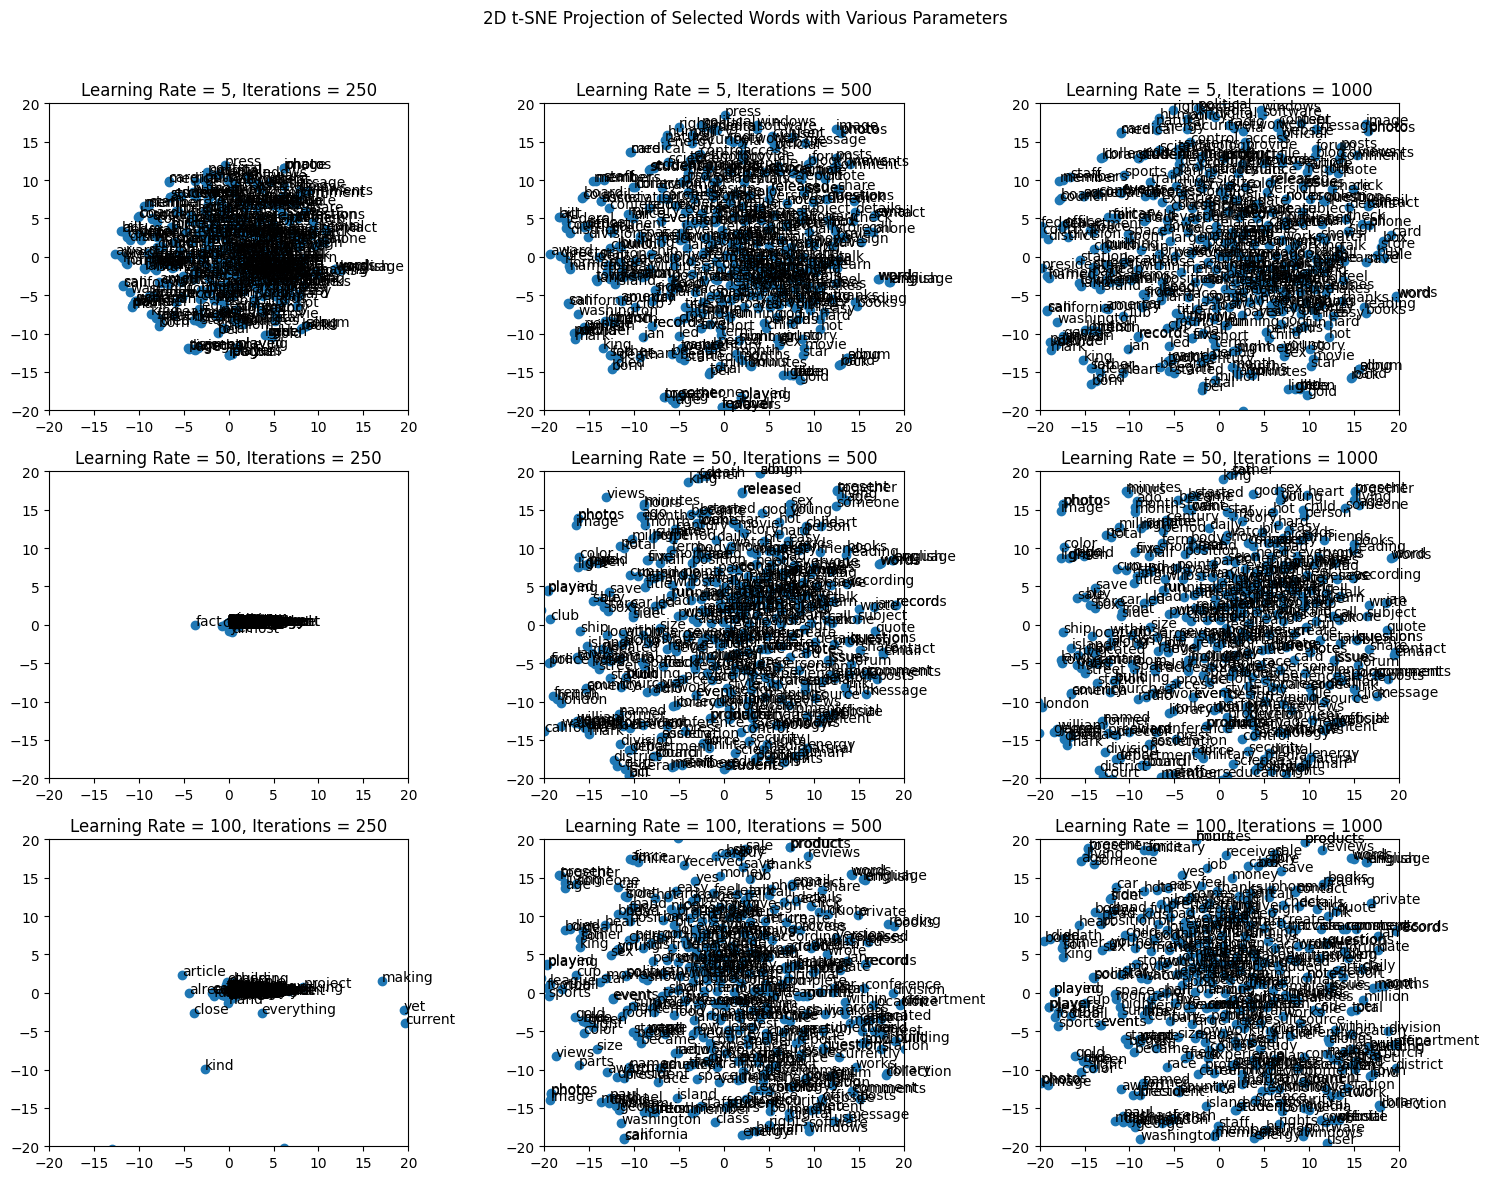

In [21]:
top_words = [w for (i, w) in enumerate(word2vec_en.idx2word)
             if i > 200 and len(w) >= 3][:400]
top_inds = [word2vec_en.word2idx[w] for w in top_words]
plt.figure(figsize=(12, 10))

# Test with various parameters
learning_rates = [5, 50, 100]
n_iter_values = [250, 500, 1000]

fig, axes = plt.subplots(len(learning_rates), len(n_iter_values), figsize=(15, 12))

for i, lr in enumerate(learning_rates):
    for j, n_iter in enumerate(n_iter_values):
        # Use PCA to project countries and capitals into 2D
        tsne = TSNE(n_components=2, learning_rate=lr, n_iter=n_iter, random_state=42)
        selected_vecs_2d = tsne.fit_transform(word2vec_en.vec[top_inds])

        # Plot the t-SNE projection
        ax = axes[i, j]
        ax.scatter(selected_vecs_2d[:, 0], selected_vecs_2d[:, 1])

        # Annotate each point with the corresponding word
        for k, word in enumerate(top_words):
            ax.annotate(word, (selected_vecs_2d[k, 0], selected_vecs_2d[k, 1]))

        ax.set_title(f'Learning Rate = {lr}, Iterations = {n_iter}')
        ax.set_xlim([-20, 20])
        ax.set_ylim([-20, 20])

plt.suptitle('2D t-SNE Projection of Selected Words with Various Parameters')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the subplot layout
plt.show()

# Problem 2: Sentence embeddings [13p+]

In this exercise you will build a simple chatbot that uses neural representations of words and sentences to perform a nearest neighbor selection of responses.

We have two sets of data:
- `./reddit_pairs.txt` of excerpts of [Reddit](https://www.reddit.com/) conversations,
- `./hackernews_pairs.txt` of excerpts from [Hackernews](https://news.ycombinator.com/).

The two corpuses are formatted as `tab`-separated pairs of utterances: a `prompt` and a `response`. Successive lines belong to different conversations.

The main idea of the chatbot is to build a representation of the user `input` and of all `prompts` from the corpus. Then select the best (or randomly one of the top few) matches and print the associated `response`.

The key to get the bot working is to create good sentence representations. We will try:
- Averaging word2vec embeddings. From the task on word analogies in Problem 1 we saw that arithmetics of word embeddings are associated with meaning, so averaging often yields reasonable sentence representations.
- Using sentence models such as [BERT (Bidirectional Encoder Representations from Transformers)](https://aclanthology.org/N19-1423.pdf).

BERT is a model to learn sentence representations with a very similar working principle as skipgrams in word2vec: it learns to predict a word based on the context in which it occurs. The main difference is that instead of representing the context as sums of individual word vectors, it computes it using transformers. Here is how it works:

![image.png](https://drive.google.com/uc?id=1jom3pNdKx7kLgwWHbbXhahm8em6x8JNf)

1. We take a sentence and mask some of its tokens with a special token `[MSK]`. We also prepend the sentence with a special token `[CLS]`.
2. We represent every token in the sentence (includding the `[MSK]` and `[CLS]` tokens) with a different vector. These vectors are randomly initialized and learned throughout training.
3. We pass the sequence of vectors through a transformer.
4. We use the output of the transformer in the masked tokens to predict the original value of the token (pre-masking) using a softmax layer and  a cross-entropy loss. Since the output of the transformer at each position contains information from all the other tokens in the sentence due to self-attention, this means we are predicting the masked word based on its context.

Since the `[CLS]` token is independent of the input and never masked, the model tends to pack information from the whole sentence into it. Therefore, after training we can use the output of the transformer in the position of the `[CLS]` token (first) as a representation of the whole sentence. Alternatively, we can average the transformer outputs across the sequence axis.   

#### Warning:
The Reddit corpus may contain abusive language, it was not heavily cleaned.

### Tasks

The code below is a starting point, but you can develop you own. The following list suggests some actions to try, along with the points that reflect the estimated difficulty. The first 4 tasks are required, the rest are optional.

1. **(2 pt)** Type in a Markdown cell a report of your actions, what did you try, why, what was the result. Show exemplary conversations (they must be probable under your model). Cherry-pick 3 nice dialogues.
2. **(1 pt)** Implement the `getResponse` function of `KNNChatbot` to return responses using k-nearest neighbor matches.
3. **(2 pt)** Represent sentences by averaging their word vectors. Properly handle tokenization (you can use regular expressions or e.g. `nltk` library). Describe how you handle lower and upper cased words. Try a few nearest neighbor selection methods (such as euclidean or cosine distance). See how embedding normalization affects the results (you can normalize individual word vectors, full sentence vectors etc.).
4. **(2 pt)** Use the [transformers](https://huggingface.co/transformers) 🤗 package to load a pretrained BERT model. Use it to represent sentences.

    _**IMPORTANT: encoding the whole corpus using BERT might take up to 30 min. To avoid re-computing, make sure to save the BERT encoded corpus to disk once you have computed it. You can use**_ `np.save` **_and_** `np.load`**.**
5. **(1 pt)** Incoportate context: keep a running average of past conversation turns.
6. **(1 pt)** Do data cleaning (including profanieties), finding rules for good responses.
7. **(1 pt)** Try mixing different sentence representation techniques.
8. **(2 pt)** Try to cluster responses to the highest scored prompts. Which responses are more funny: from the largerst or from the smallest clusters?.
9. **(1 pt+)** Implement your own enhancements.

Let's download the data needed:

In [22]:
# Download conversation corpuses
![ -e  hackernews_pairs.txt ] || gdown 'https://drive.google.com/uc?id=1B8APZpI03gOdv8L537i27VP2zuOIW8z-' -O hackernews_pairs.txt
![ -e  reddit_pairs.txt ] || gdown 'https://drive.google.com/uc?id=1Gjof-ECoK6VJ1r5BFfQUDnCIne7o8nXO' -O reddit_pairs.txt

Downloading...
From: https://drive.google.com/uc?id=1B8APZpI03gOdv8L537i27VP2zuOIW8z-
To: /content/hackernews_pairs.txt
100% 4.39M/4.39M [00:00<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Gjof-ECoK6VJ1r5BFfQUDnCIne7o8nXO
To: /content/reddit_pairs.txt
100% 3.89M/3.89M [00:00<00:00, 258MB/s]


In [23]:
# We load the data
prompts = []
responses = []
err_lines = []
with open('./reddit_pairs.txt') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        line = line.split('\t')
        if len(line)!=2:
            err_lines.append(line)
        else:
            prompts.append(line[0])
            responses.append(line[1])

with open('./hackernews_pairs.txt') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        line = line.split('\t')
        if len(line)!=2:
            err_lines.append(line)
        else:
            prompts.append(line[0])
            responses.append(line[1])

print(f"Failed to parse the following {len(err_lines)} lines: {err_lines}")
print(f"Sample dialogue pairs: \n{pprint.pformat(list(zip(prompts[:15], responses)))}")

Failed to parse the following 7 lines: [['1602 link karma', '11259 comment karma', 'damn you got almost all your karma here'], ['lol'], ['50$ skin pls'], ['omg his posting how'], ['11', 'inches to be precise :)', 'holy shit your girl has found herself a fuckin unicorn!'], ['( ) no fuk'], ['looks like you post on multiple porn subreddits']]
Sample dialogue pairs: 
[('show', 'me your moves?'),
 ('haters gonna hate', 'hate'),
 ('i think he is doing sarcasm.',
  'hahaha, you stupid twat, go and have a wank'),
 ('i can do 38 for void head :)', '39k man cant go for 38k'),
 ('brb getting hit by a car', 'did your mate, also buy you a computer?'),
 ('reason ?', 'to pay for bandwidth to troll people online.'),
 ('*155k notes...*', 'welcome to tumblr'),
 ('is it just me or is this pitched up?',
  'might be to avoid copyright issues.'),
 ('no chapter this week bud :(', '**cough*'),
 ("that's gonna come back for a block in the back",
  "but it doesn't matter. fuck this game. connor cook playing ful

In [24]:
# Just a template for our encoders
class BasicEncoder:
    def encode(self, sentence):
        # this is a base class!
        raise NotImplementedError

    def encode_corpus(self, sentences):
        ret = [self.encode(sentence) for sentence in tqdm(sentences)]
        return np.vstack(ret)

We start with the simplest possible sentence encoder. We use a [count vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), which represents a sentence as a vector of the dimension of our vocabulary in which the number at the index $i$ is the number of times that the $i$-th word of our vocabulary occurs in the sentence. E.g. for a vocabulary of size 10, the sentence: *"to be or not to be"*, and the indices of the words: {"to": 3, "be": 0, "or": 6, "not": 9}, then our sentence representation would be $[2,0,0,2,0,0,1,0,0,1]$. This is not really a good strategy, as the location in representation space of the sentence embeddings has no relation to its meaning, but it will give us a baseline over which we should see improvements when using better sentence embedding methods.

***The code below implements a simple baseline: we encode each sentence as a sparse vector which sums word occurrences.***

In [25]:
# The simplest possible encoder, we represent words as one-hot vectors using the
class OneHotEncoder(BasicEncoder):
    def __init__(self, sentences):
        self.vectorizer = sklearn.feature_extraction.text.CountVectorizer()
        self.vectorizer.fit(sentences)

    def encode(self, sentence):
        return self.vectorizer.transform([sentence])[0]

    def encode_corpus(self, sentences):
        # Override because sklearn already works on batches
        encodings = self.vectorizer.transform(sentences)
        # Note: this code needs to handl the scipy sparse matrix
        #erences with numpy  which has subtle diffndarrays
        norms = np.array((encodings.power(2)).sum(1))**0.5
        non_zero_norms = norms != 0
        encodings = encodings.multiply(1.0 / norms)
        return encodings


countEncoder = OneHotEncoder(prompts)
encodings = countEncoder.encode_corpus(prompts)

prompt = "Ultimate question: Windows or Linux?"
enc = countEncoder.encode(prompt)

# Deal with encodings being sparse matrices. Word2vecs will not have these pecularities
scores = (encodings @ enc.T).toarray().ravel()
top_idx = scores.argsort()[-10:][::-1]

for idx in top_idx:
    print(scores[idx], prompts[idx], ':', responses[idx])

1.0606601717798212 is in windows or in linux? : windows
1.0 1 or 2? : * or 3
1.0 p or i : yes
1.0 1 or 2? : 2 in the car this morning for me
1.0 3 or 4 : ok...
1.0 Windows? : Unix based systems
1.0 or : god damnit stop teasing me
1.0 Question. : In a sense 'maybe not'.
1.0 Question. : This is a good question!
1.0 or : ty m8


<ipython-input-25-e3d0ecf41c5d>:17: RuntimeWarning: divide by zero encountered in divide
  encodings = encodings.multiply(1.0 / norms)


## Problem 2, Task 2: Implement the KNN chatbot

In [26]:
# TODO: build a simple dialogue system using these k-nearest neighbor matches
# perform a few test conversations
class KNNChatbot:
    def __init__(self, encoder, corpus):
        self._encoder = encoder
        self._sentenceEmbeddings = corpus[0]
        self._responses = corpus[1]

    def getResponse(self, query, epsilon, k=5):
        query = self._encoder.encode(query)
        scores = (self._sentenceEmbeddings @ query.T).toarray().ravel() # Compute distances
        topIdxs = scores.argsort()[-k:][::-1] # Compute top-k neighbors
        if random.random() < epsilon: # With probability epsilon return the response of one of the top-k neighbors
            return self._responses[np.random.choice(topIdxs)]
        else: # With probability 1 - epsilon just return the response of the nearest neighbor
            return self._responses[topIdxs[0]]

In [27]:
chatBot = KNNChatbot(countEncoder, (encodings, responses))

print(colored('Hal2021:\n', 'red'), "Good morning, Dave.")

while True:
    try:
        print(colored('Me: ', 'blue'))
        prompt = input()
        print(colored('Hal2021:\n', 'red'), chatBot.getResponse(prompt, epsilon=0.0))
        if prompt.lower() == 'bye':
            break
    except KeyboardInterrupt:
        break

Hal2021:
 Good morning, Dave.
Me: 
Good morning  Hal
Hal2021:
 lie.
Me: 
what?
Hal2021:
 ya heard fam
Me: 
How old are you ?
Hal2021:
 im 29 years old
Me: 
you okay ?
Hal2021:
 ty as well, every one is so awesome here
Me: 
see you
Hal2021:
 me too
Me: 
bye
Hal2021:
 bye, won't miss u:^(


## Problem 2, Task 3: Sentence representations as average of word embeddings

In [28]:
class Word2VecEncoder(BasicEncoder):
    def __init__(self, vecs):
        self._vecs = vecs
        self._tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
        self._embeddingDim = 100

    def _get_vec(self, word):
        # TODO:
        # Find the vector for word, or use a suitable out-of-vocabulary vector
        if word in self._vecs.word2idx:
            return self._vecs.vec[self._vecs.word2idx[word]]
        else:
            return np.zeros(self._vecs.vec.shape[1])


    def encode(self, sentence, normalizeByWord=True):
        ret = np.zeros(self._vecs.vec.shape[1])
        for token in self._tokenizer.tokenize(sentence):
            word_vec = self._get_vec(token)
            ret += word_vec
        ret /= (np.linalg.norm(ret) + 1e-5)
        return ret

word2vecEncoder = Word2VecEncoder(word2vec_en)
encodings = word2vecEncoder.encode_corpus(prompts)

  0%|          | 0/125497 [00:00<?, ?it/s]

In [29]:
type(enc)

scipy.sparse._csr.csr_matrix

In [30]:
prompt = "Ultimate question: Windows or Linux?"
enc = word2vecEncoder.encode(prompt)
scores = encodings @ enc.T
top_idx = scores.argsort()[-10:][::-1]

for idx in top_idx:
    print(scores[idx], prompts[idx], ':', responses[idx])

0.9999928984096242 Honest question here. : Everything ends.
0.9999928984096242 Interesting question. : Fair point.
0.9999928984096242 Wrong question. : That's a a good question.
0.9999928984096242 Wrong question. : Sorry, I misunderstood you.
0.9999928984096242 That is the question. : I read this to my team.
0.9999928984096242 Tough question. : Why is there an export ban on crude oil?
0.9999928984096242 Tough question. : I imagine the parent hopes you are wrong.
0.9999928984096242 Tough question, but why not? : Leaving aside implementation practicalities (i.e.
0.9999928984096242 N00b question. : Depends on the application.
0.9999928984096242 Tough question, but why not? : Freedom of speech.


***Without Normilzation***

In [31]:
prompt = "Ultimate question: Windows or Linux?"
enc = word2vecEncoder.encode(prompt, normalizeByWord=False)
scores = encodings @ enc.T
top_idx = scores.argsort()[-10:][::-1]

for idx in top_idx:
    print(scores[idx], prompts[idx], ':', responses[idx])

0.9999928984096242 Honest question here. : Everything ends.
0.9999928984096242 Interesting question. : Fair point.
0.9999928984096242 Wrong question. : That's a a good question.
0.9999928984096242 Wrong question. : Sorry, I misunderstood you.
0.9999928984096242 That is the question. : I read this to my team.
0.9999928984096242 Tough question. : Why is there an export ban on crude oil?
0.9999928984096242 Tough question. : I imagine the parent hopes you are wrong.
0.9999928984096242 Tough question, but why not? : Leaving aside implementation practicalities (i.e.
0.9999928984096242 N00b question. : Depends on the application.
0.9999928984096242 Tough question, but why not? : Freedom of speech.


In [32]:
# Ecludian distance
prompt = "Ultimate question: windows or linux?"
enc = word2vecEncoder.encode(prompt, normalizeByWord=False)
scores = np.linalg.norm(encodings - enc, axis=1)
top_idx = scores.argsort()[:10]

for idx in top_idx:
    print(scores[idx], prompts[idx], ':', responses[idx])

0.3163911571977823 is in windows or in linux? : windows
0.39860695399719875 I know ubuntu, osx and windows 7 phone home for certains scenarios. : It's possible to disable tracking on all of those though.
0.4322950406212212 Would you rather work on the linux kernel instead of windows? : What's the relation to the post to which you're replying?
0.44800540661719696 Running desktop linux : Free-form speech recognition
0.44937985232769484 linux. : linux indeed.
0.47911578445340525 Some window managers on linux describe this as "sticky windows". : OK, I get it.
0.47911578445340525 Some window managers on linux describe this as "sticky windows". : I don't know win 10, I use xmonad.
0.4886902102956815 No linux client? : Wait a week, someone will develop one.
0.4886902102956815 No linux client? : There is a web client for it.
0.49843385623094916 Are you rebooting all your windows servers for each little update too then? : No.


In [33]:
# TODO: build a simple dialogue system using these k-nearest neighbor matches with the word2vec encoder.
# You can redefine the KNNChatbot class if you have to

class KNNChatbot:
    def __init__(self, encoder, corpus):
        self._encoder = encoder
        self._sentenceEmbeddings = corpus[0]
        self._responses = corpus[1]

    def getResponse(self, query, epsilon, k=5, distance='cosine', normalizeByWord=True):
        query = query.lower()
        query = self._encoder.encode(query, normalizeByWord)
        if distance == 'cosine':
            scores = (encodings @ query.T)# Compute distances
            topIdxs = scores.argsort()[-k:][::-1] # Compute top-k neighbors
        else: # euclidian
            scores = np.linalg.norm(encodings - enc, axis=1)
            topIdxs = scores.argsort()[:k]
        if random.random() < epsilon: # With probability epsilon return the response of one of the top-k neighbors
            return self._responses[np.random.choice(topIdxs)]
        else: # With probability 1 - epsilon just return the response of the nearest neighbor
            return self._responses[topIdxs[0]]

In [34]:
chatBot = KNNChatbot(word2vecEncoder, (encodings, responses))

print(colored('Hal2021:\n', 'red'), "Good morning, Dave.")

while True:
    try:
        print(colored('Me: ', 'blue'))
        prompt = input()
        print(colored('Hal2021:\n', 'red'), chatBot.getResponse(prompt, epsilon=0.0, distance='cosine'))
        if prompt.lower() == 'bye':
            break
    except KeyboardInterrupt:
        break

Hal2021:
 Good morning, Dave.
Me: 
Good morning
Hal2021:
 especially then
Me: 
who are you ?
Hal2021:
 Ah, you're right.
Me: 
How olda re you ?
Hal2021:
 Ah, you're right.
Me: 
how old are you ?
Hal2021:
 2 months shy of 21
Me: 
congratulations
Hal2021:
 wow so many great feedbacks!
Me: 
bye
Hal2021:
 haha!


## Problem 2, Task 4: Sentence representations from BERT

### Example of loading and using a BERT model to obtain a sentence representation

In [35]:
!pip install --upgrade transformers huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 32.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [36]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)
# Define a single sentence
sentence = "Ultimate question: Windows or Linux?"
# Tokenize the sentence and convert to tensor
tokens = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
input_ids = tokens['input_ids']
attention_mask = tokens['attention_mask']
# Forward pass to get embeddings
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
# Extract embeddings from the last layer
last_hidden_states = outputs.last_hidden_state
# Use the [CLS] token embedding as the sentence embedding
sentence_embedding = last_hidden_states[:, 0, :]
# Print the resulting embedding shape
print(sentence_embedding.shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

torch.Size([1, 768])


In [37]:
# TODO: build a BERT encoder. You should follow a similar template to the one used in Word2VecEncoder
# NOTE: encoding the whole corpus using BERT might take up to 30 min, so make sure to save them to disk
# so that you don't have to recompute them again. You can use np.save and np.load
class BertEncoder(BasicEncoder):
    def __init__(self, model, tokenizer):
        self._tokenizer = tokenizer
        self._model = model

    def encode(self,sentence, normalizeByWord=True):
        # Tokenize the sentence and convert to tensor
        tokens = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
        input_ids = tokens['input_ids']
        attention_mask = tokens['attention_mask']

        #look for GPU
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self._model.to(device)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        # Forward pass to get embeddings
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)

        # Extract embeddings from the last layer
        last_hidden_states = outputs.last_hidden_state

        # Use the [CLS] token embedding as the sentence embedding
        sentence_embedding = last_hidden_states[:, 0, :]

        # Print the resulting embedding shape
        return sentence_embedding.cpu()

bertEncoder = BertEncoder(model, tokenizer)
encodings = bertEncoder.encode_corpus(prompts)
np.save('bert_encodings', encodings)






  0%|          | 0/125497 [00:00<?, ?it/s]

In [38]:
encodings = np.load('bert_encodings.npy')

In [39]:
# TODO: build a simple dialogue system using these k-nearest neighbor matches with the BERT encoder.
# You can redefine the KNNChatbot class if you have to

class KNNChatbot:
    def __init__(self, encoder, corpus):
        self._encoder = encoder
        self._sentenceEmbeddings = corpus[0]
        self._responses = corpus[1]

    def getResponse(self, query, epsilon, k=5):
        query = self._encoder.encode(query)
        scores = encodings @ query.numpy().T # Compute distances
        topIdxs = scores.argsort(axis = 0)[-k:][::-1].squeeze() # Compute top-k neighbors
        if random.random() < epsilon: # With probability epsilon return the response of one of the top-k neighbors
            return self._responses[np.random.choice(topIdxs)]
        else: # With probability 1 - epsilon just return the response of the nearest neighbor
            return self._responses[topIdxs[0]]



In [40]:
chatBot = KNNChatbot(bertEncoder, (encodings, responses))

print(colored('Hal2021:\n', 'red'), "Good morning, Dave.")

while True:
    try:
        print(colored('Me: ', 'blue'))
        prompt = input()
        print(colored('Hal2021:\n', 'red'), chatBot.getResponse(prompt, epsilon=0.0))
        if prompt.lower() == 'bye':
            break
    except KeyboardInterrupt:
        break

Hal2021:
 Good morning, Dave.
Me: 
Good morning Hal
Hal2021:
 oh hai doggy
Me: 
hai you dog
Hal2021:
 bye
Me: 
wtf why ?
Hal2021:
 i'm glad we can agree that i was right. =)
Me: 
no you don't
Hal2021:
 The phrase "testing alone" was key.
Me: 
maybe
Hal2021:
 probably
Me: 
what time is it ?
Hal2021:
 secret
Me: 
you are in present or past
Hal2021:
 (or hollywood)
Me: 
hahah funny
Hal2021:
 its true
Me: 
bye
Hal2021:
 rip


## Problem 2, Task 5: Incoportate context: keep a running average of past conversation turns.

In [41]:
class BertEncoder(BasicEncoder):
    def __init__(self, model, tokenizer):
        self._tokenizer = tokenizer
        self._model = model
        self._context_embeddings = []  # Initialize an empty list to store context embeddings

    def encode(self,sentence, normalizeByWord=True):
        # Tokenize the sentence and convert to tensor
        tokens = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
        input_ids = tokens['input_ids']
        attention_mask = tokens['attention_mask']

        #look for GPU
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self._model.to(device)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        # Forward pass to get embeddings
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)

        # Extract embeddings from the last layer
        last_hidden_states = outputs.last_hidden_state

        # Use the [CLS] token embedding as the sentence embedding
        sentence_embedding = last_hidden_states[:, 0, :]

        # Append the current sentence embedding to the context embeddings
        self._context_embeddings.append(sentence_embedding.cpu().numpy())

        # Print the resulting embedding shape
        return sentence_embedding.cpu()

    def get_context_embedding(self):
        # Calculate the average context embedding
        if self._context_embeddings:
            return np.mean(np.array(self._context_embeddings), axis=0)
        else:
            return None

bertEncoder = BertEncoder(model, tokenizer)
encodings = bertEncoder.encode_corpus(prompts)
np.save('bert_context_encodings', encodings)

  0%|          | 0/125497 [00:00<?, ?it/s]

In [42]:
encodings = np.load('bert_context_encodings.npy')

In [43]:
class KNNChatbot:
    def __init__(self, encoder, corpus):
        self._encoder = encoder
        self._sentenceEmbeddings = corpus[0]
        self._responses = corpus[1]

    def getResponse(self, query, epsilon, k=5):
        query_embedding = self._encoder.encode(query)
        context_embedding = self._encoder.get_context_embedding()

        if context_embedding is not None:
            # Combine the query embedding with the context embedding
            query_embedding = 0.5 * (query_embedding + context_embedding)

        scores = self._sentenceEmbeddings @ query_embedding.numpy().T  # Compute distances
        topIdxs = scores.argsort(axis=0)[-k:][::-1].squeeze()  # Compute top-k neighbors

        if random.random() < epsilon:  # With probability epsilon return the response of one of the top-k neighbors
            return self._responses[np.random.choice(topIdxs)]
        else:  # With probability 1 - epsilon just return the response of the nearest neighbor
            return self._responses[topIdxs[0]]

In [44]:
chatBot = KNNChatbot(bertEncoder, (encodings, responses))

print(colored('Hal2021:\n', 'red'), "Good morning, Dave.")

while True:
    try:
        print(colored('Me: ', 'blue'))
        prompt = input()
        print(colored('Hal2021:\n', 'red'), chatBot.getResponse(prompt, epsilon=0.0))
        if prompt.lower() == 'bye':
            break
    except KeyboardInterrupt:
        break

Hal2021:
 Good morning, Dave.
Me: 
Good morning Hal
Hal2021:
 Indeed.
Me: 
Hello
Hal2021:
 you smell funny.
Me: 
you too
Hal2021:
 more than you apparently
Me: 
haha stfu
Hal2021:
 wat? yes.
Me: 
stfu
Hal2021:
 y u no share
Me: 
idk
Hal2021:
 the black hole crashed my game lol
Me: 
How are you m8
Hal2021:
 yup definately. still have box and accessories?
Me: 
bye
Hal2021:
 hello?is it me youre looking for?


## Problem 2, Task 6: Do data cleaning (including profanieties), finding rules for good responses.

## Problem 2, Task 7: Try mixing different sentence representation techniques.

## Problem 2, Task 8: Try to cluster responses to the highest scored prompts. Which responses are more funny: from the largerst or from the smallest clusters?

## Problem 2, Task 9: Implement your own enhancements

# Problem 3: Image embeddings [8p]

Self-supervised learning has been most successful in the language domain, where applying contrastive losses is straightforward. As we mentioned in the lecture, this is mostly due to language having a relatively low-dimensional output space (the number of words/pseudowords/characters in our vocabulary) over which we can compute probability distributions with relative ease. Images, on the other hand, can have ridiculously large output spaces. For instance, just with very small 8-bit color 64x64 pixels images, if we would want to assign a probability to each posible image (i.e. each possible pixel configuration), we would end up with an output space of dimension $(2^8 )^{(64 \times 64)} = 256^{4096}$! which is totally intractable (the number of atoms in the visible universe is around $256 ^ {32}$).

In the last couple of years however there has been significant progress on self-supervised learning for computer vision. The main driver of progress has been the development of good regularization techniques as alternatives to contrastive learning. In this task we will use a model trained through [Self-**DI**stillation with **NO** labels (DINO)](https://arxiv.org/pdf/2104.14294.pdf), one of those algorithms based on regularization instead of contrastive learning that has been very successful for self-supervised computer vision.

## DINO

DINO is similar to the examples we saw on the lecture, where we trained our model to have a similar output to two different augmentations (variations) of the same image. However, instead of using the same network to compute the outputs, we use two networks: a **teacher** and a **student**.

Both networks have the same architecture and are initialized with the same weights, but they receive different inputs, and are updated differently. The **teacher receives global views** of the image (crops containing more than 50\% of the original image), while the **student receives both global and local views** (crops containing less than 50\% of the image). Both networks have a softmax layer as output. We train the student to follow the teacher using a cross-entropy loss. Since the teacher receives only global information, the **student is forced to learn the parts of the local crops which are helpful to predict global features**.

Only the student network is trained using gradient descent, while the teacher weights are updated as an exponential moving average (EMA) of the weights of the student.

![image.png](https://drive.google.com/uc?id=16NamnqnSQN7sWKU9ippfaLGo3J2bVJWq)
*Taken from [Meta's blog introducing DINO](https://ai.meta.com/blog/dino-paws-computer-vision-with-self-supervised-transformers-and-10x-more-efficient-training/)*

DINO applies two regularization methods to the teacher to avoid representation collapse (as a reminder, representation collapse is when the model gives the same output regardless of the input):

1. **Centering**: we substract to the teacher's outputs a running average of its output across previous batches. This prevents the model from giving a constant output where one of the dimensions dominates. E.g. if the model always assigned a constant probability of 0.6 to the first dimension, the average of this dimension would be 0.6 and the bias would be removed.

2. **Sharpening**: with centering there is still a way for the model to fool us: it could always output the same value across each dimension, then after removing the bias all the values would be zero, and after applying the softmax we would have a uniform distribution at the output for every input. In order to prevent this, we force the probabilites at the output to be sharp, i.e. the model should assign high probability to some dimensions and therefore low probability to others. We do this by using a small temperature parameter $\tau$ in the Softmax equation:

    $
        \text{Softmax}(z_i) = \frac{\exp(z_i \, / \, \tau)}{\exp(\sum_j z_j \,/ \, \tau)}
    $

    The temperature parameter controls the level of uncertainty in the probability distribution. A higher temperature will result in a softer, more uniform distribution, making the model more uncertain about its predictions. On the other hand, a lower temperature will produce a sharper distribution, making the model more confident in its predictions.

By forbidding constant sharp predictions (through centering) and uniform predictions (through sharpening) we prevent trivial solutions that result in representation collapse, and force the model to use the information in the input.

### Emergent properties in Vision Transformers trained with DINO

For the student and teacher networks DINO uses a vision transformer (ViT) very similar to the one that you implemented in your previous assignment. The only difference that is important for us in this task, is that instead of using an average pooling across the sequence axis to compute the image embedding, DINO concatenates a special token `[CLS]` at the beginning of the sequence (same as BERT) and uses its representation to compute the Softmax output. This forces the model to encapsulate all the relevant information in this token, and therefore we can use it as a representation of the whole sequence (image).

It turns out that training ViTs with the DINO algorithm results in the emergence of some interesting properties:

1. We can extract semantic segmentations from the attention matrices at the `[CLS]` token.
2. The image embeddings (obtained as the representation at the `[CLS]` token) cluster very nicely according to object categories. Therefore they make up for excelent features for classification with very simple methods.

In this exercise you will use a pre-trained DINO model to extract image features, analyze them, and apply them to solve computer vision problems.

### Tasks

We will use the [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/), a 37 category pet dataset with roughly 200 images for each class. The labels correspond to the breed of the pet. As model we will use the DINO ViT small (larger models perform better but require lots of GPU memory) with 8x8 image patches.

1. **(1 pt)** Plot the attention maps of the `CLS` token (i.e. the values of the attention matrix using the `CLS` token as query) to visualize the unsupervised semantic segmentations learned by DINO. Make sure to reshape the 1D attention values back to a 2D array corresponding to the 2D grid of image patches. In order to upsample the patches back to the original image resolution you can use `nn.functional.interpolate`.
2. **(1 pt)** Similarly as you did with word2vec and BERT embeddings, now try to visualize the embedding space produced by DINO using a t-SNE plot. Try to find meaningful clusters, for instance coloring them by object category or visually inspecting the samples in each cluster.
3. **(2 pt)** Implement a k nearest neighbors (KNN) classifier on top of the DINO image embeddings. In case is needed, here it's a short description of the KNN algorithm: to classify a sample in your test set, find the $k$ samples in your training set that are closest to it, and predict as output the most common class among this $k$ neighbors. Compute the top-1 accuracy (i.e. how often the model predicted the right class as its first option) and top-5 accuracy (i.e. how often the correct class was among the top 5 predictions) on the test set. Do so for $k \in \{1, 5, 10, 20, 100, 200\}$.

    Compare the results using DINO embeddings to results when using a randomly initialized DINO model to extract the embeddings. This is a baseline to which we can compare to assess how useful was what DINO learned through self-supervised training. To re-initialize the model you can use `model.apply(model._init_weights)`
    
4. **(1 pt)** Train a linear classifier on top of the DINO image embeddings and compute the top-1 accuracy on the test set. Once again, compare against a randomly initialized DINO model.

5. **(3 pt)** Train a linear classifier on top of DINO's upsampled `CLS` attention maps (what you visualized in task 1) to do semantic segmentation on the [FoodSeg103](https://huggingface.co/datasets/EduardoPacheco/FoodSeg103).

In [45]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00


In [46]:
# Modules required for this problem
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from datasets import load_dataset
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, ToPILImage
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
import os
import random

Generating train split:   0%|          | 0/3680 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3669 [00:00<?, ? examples/s]

Species:  cat 	Breed:  maine_coon


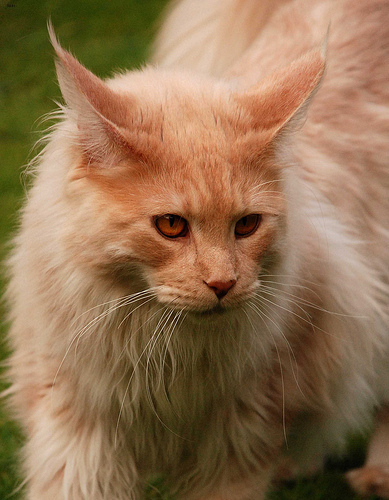

In [47]:
# We load the dataset using HuggingFace datasets. When you run it in a fresh env it will download the data
dataset = load_dataset("timm/oxford-iiit-pet")
# Dictionaries mapping from index to categories
id2species = {0: "cat", 1: "dog"}
breeds = dataset["train"].features["label"].names
id2breed = {id: label for id, label in enumerate(breeds)}
breed2id = {label: id for id, label in enumerate(breeds)}
# Let's take a look to one of the pics:
example = dataset["train"][0]
print("Species: ", id2species[example["label_cat_dog"]], "\tBreed: ", id2breed[example["label"]])
example["image"]

In [48]:
# We will use GPU if available. Please make sure to use GPU, unless you're debugging, otherwise it will be painfully slow.
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# Load model from torchhub (Pytorch repository of models)
model = torch.hub.load('facebookresearch/dino:main', 'dino_vits8')
# Freeze model parameters. We will use the model just as feature extractor, hence we don't update its parameters
for p in model.parameters():
    p.requires_grad = False
model.eval()
model.to(device)

Downloading: "https://github.com/facebookresearch/dino/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall8_pretrain/dino_deitsmall8_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_deitsmall8_pretrain.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 125MB/s]


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(8, 8), stride=(8, 8))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-11): 12 x Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
  (head): Identity()
)

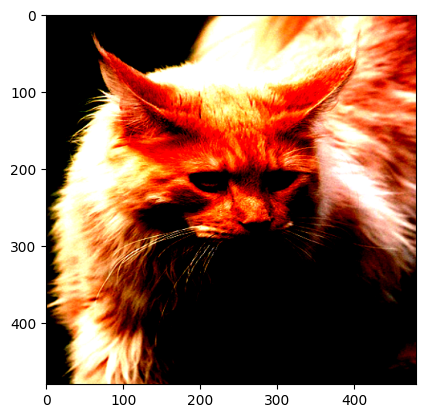

In [49]:
# We default to image sizes of 480x480
image_size = (480, 480)
# The model that we use uses patches of 8x8
patch_size = 8
# preprocessing
transform = Compose([
    Resize(image_size), # We resize the image to the desired size
    ToTensor(), # convert it to Float tensors in the range [0, 1]
    Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # and normalize it to have mean 0 std 1.0
])

# Function to apply the preprocessing
def transforms(examples):
    examples["image"] = [transform(image.convert("RGB")).to(device) for image in examples["image"]]
    return examples
# apply the preprocessing
dataset.set_transform(transforms)
# We take a look to the pre-processed image
example = dataset["train"][0]["image"]
plt.imshow(example.cpu().permute(1, 2, 0))

## Problem 3, Task 1: Plot the attention maps of the CLS  token

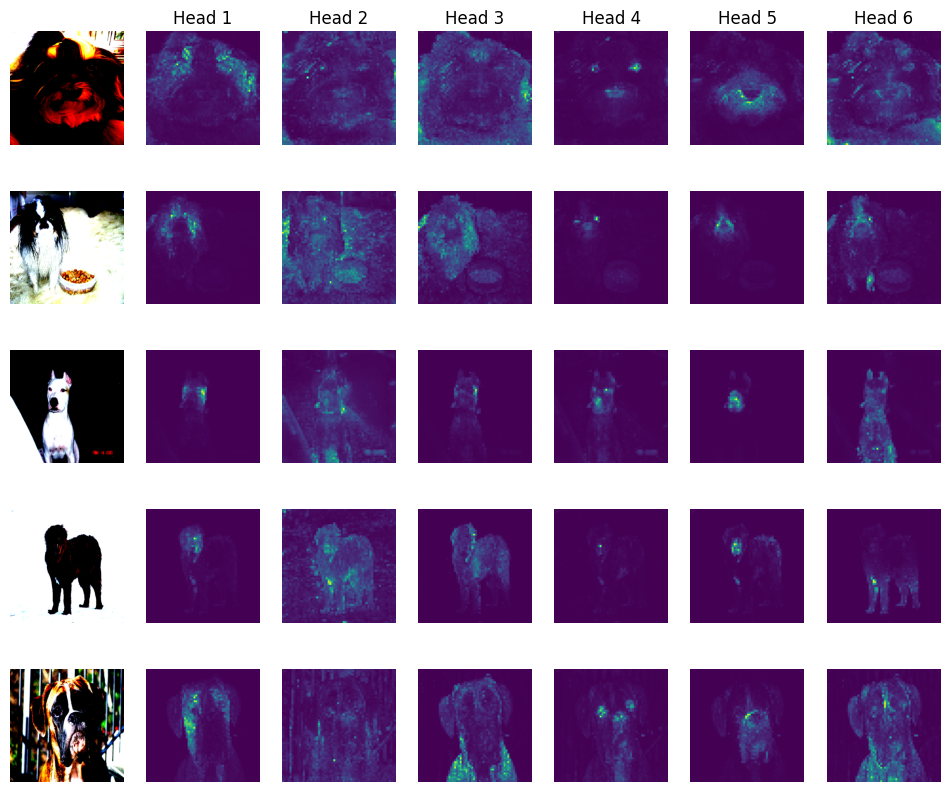

In [50]:
# We will visualize the attention maps for 5 samples
n_pics = 5
sel_idxs = random.choices(range(len(dataset["train"])), k=n_pics)
# Number of attention heads
num_heads = model.blocks[0].attn.num_heads
# Dimension of image downsampled by patch size
w_featmap = image_size[0] // patch_size
h_featmap = image_size[1] // patch_size
# Create a grid of subplots
fig, axs = plt.subplots(n_pics, num_heads + 1, figsize=(num_heads * 2, n_pics * 2))
# Add titles to the columns
for j, ax in enumerate(axs[0]):
    if j == 0:
        continue
    ax.set_title(f'Head {j}')
for i, sample_idx in enumerate(sel_idxs):
    img = dataset["train"][sample_idx]["image"]
    axs[i, 0].imshow(img.cpu().permute(1, 2, 0))
    axs[i, 0].axis('off')
    # Get attention maps for the current image
    attentions = model.get_last_selfattention(
        img.unsqueeze(0).to(device)
    ) # attention matrix of dimensions: batch size x num heads x (sequence length + 1) x (sequence length + 1) ...
    # ..., the + 1 comes from the special CLS token
    # Extract the attention scores obtained from using the CLS token as query
    attentions = attentions[0, :, 0, 1:].detach().cpu().numpy()
    # Reshape the vector of attention scores (attention map) to the dimension of the downsamples image
    attentions = attentions.reshape(num_heads, h_featmap, w_featmap)
    # Upsample the attention map to the resolution of the original image
    attentions = torch.tensor(attentions).numpy()
    # Plot attention maps in the corresponding subplot
    for j, attention_map in enumerate(attentions):
        axs[i, j + 1].imshow(attention_map)
        axs[i, j + 1].axis('off')

plt.show()

## Extracting features

For the following tasks we'll need to convert our dataset of images to a dataset of image embeddings. The following code implements that.

_Note: if you run into out of memory GPU errors, lower the batch size_

In [51]:
# A dataset that returns also the index of each sample. We use the index to store the embeddings in a big tensor
class ReturnIndexDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset.__getitem__(idx)
        return sample["image"], sample["label"], idx

@torch.no_grad()
def extract_features(model, data_loader):
    features = None
    labels = None
    for samples, targets, index in tqdm(data_loader):
        feats = model(samples).clone()
        # init storage feature matrix
        if features is None:
            features = torch.zeros(len(data_loader.dataset), feats.shape[-1]).cuda(non_blocking=True)
            labels = torch.zeros((len(data_loader.dataset),), dtype=torch.int64).cuda(non_blocking=True)
            print(f"Storing features into tensor of shape {features.shape}")
        # update storage feature matrix
        features.index_copy_(0, index.to(device).view(-1), feats)
        labels.index_copy_(0, index.to(device).view(-1), targets.to(device))
    features = nn.functional.normalize(features, dim=1, p=2)
    return features, labels

batch_size = 4
train_data = ReturnIndexDataset(dataset["train"])
train_loader = DataLoader(train_data, batch_size=batch_size)
test_data = ReturnIndexDataset(dataset["test"])
test_loader = DataLoader(test_data, batch_size=batch_size)

def get_feats_and_labels(split):
    # We check if the features have been already computed and stored in disk, in which case we load them
    if os.path.exists(f"{split}feat.pth"):
        print(f"Loading {split} features and labels from disk ...")
        assert os.path.exists(f"{split}labels.pth"), f"{split} labels not found"
        feats = torch.load(f"{split}feat.pth")
        labels = torch.load(f"{split}labels.pth")
        print(f"{split} features loaded")
    else: # If not, we compute them and save them to disk
        loader = train_loader if split == "train" else test_loader
        print(f"Extracting {split} features ...")
        feats, labels = extract_features(model, loader)
        # save features and labels
        torch.save(feats.cpu(), os.path.join(f"{split}feat.pth"))
        torch.save(labels.cpu(), os.path.join(f"{split}labels.pth"))
    return feats, labels

train_feats, train_labels = get_feats_and_labels("train")
test_feats, test_labels = get_feats_and_labels("test")

Extracting train features ...


  0%|          | 0/920 [00:00<?, ?it/s]

Storing features into tensor of shape torch.Size([3680, 384])
Extracting test features ...


  0%|          | 0/918 [00:00<?, ?it/s]

Storing features into tensor of shape torch.Size([3669, 384])


## Problem 3, Task 2: Visualize the embeddings of the CLS token using t-SNE plots

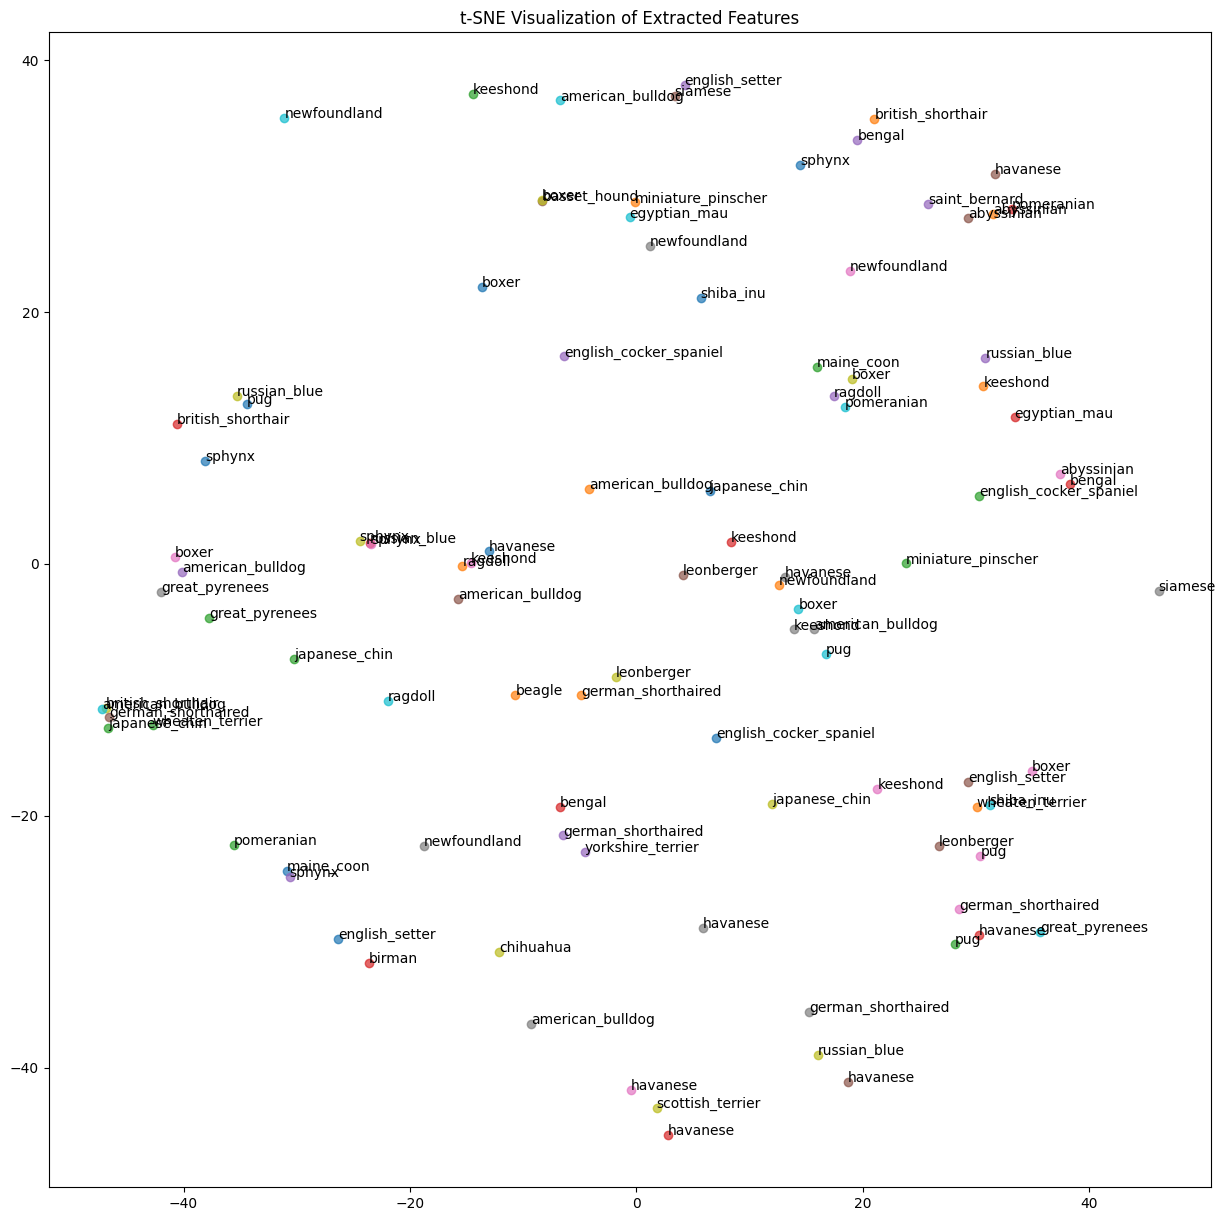

'\n\n\n'

In [59]:
# TODO: visualize in 2D or 3D the extracted features using a t-SNE plot

from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=10, learning_rate=10)
embedded_feats = tsne.fit_transform(test_feats.cpu().numpy())
plt.figure(figsize=(15,15))


for index, embedded_feat in enumerate(embedded_feats[:100]):
    plt.scatter(embedded_feat[0], embedded_feat[1], label=str(test_labels[index]), alpha=0.7)
    plt.annotate(id2breed[int(train_labels.cpu()[index])],(embedded_feat[0], embedded_feat[1]))
plt.title("t-SNE Visualization of Extracted Features")

plt.show()

'''


'''

## Problem 3, Task 3: Implement a KNN classifier to classify pet breeds using DINO embeddings

In [60]:
@torch.no_grad()  # This decorator disables gradient tracking to save memory and computations
def knn_classifier(train_features, train_labels, test_features, test_labels, k, num_classes, T):
    # Initialize counters for accuracy calculations
    top1, top5, total = 0.0, 0.0, 0

    # Transpose the training features for matrix multiplication
    train_features = train_features.t()

    # Calculate the number of chunks to split the test data into
    num_test_images, num_chunks = test_labels.shape[0], 100
    imgs_per_chunk = num_test_images // num_chunks

    # Initialize a tensor for storing one-hot encodings of retrieved neighbors
    retrieval_one_hot = torch.zeros(k, num_classes).to(train_features.device)

    # Process the test data in chunks
    for idx in range(0, num_test_images, imgs_per_chunk):
        # Extract features and labels for the current chunk
        features = test_features[idx: min((idx + imgs_per_chunk), num_test_images), :]
        targets = test_labels[idx: min((idx + imgs_per_chunk), num_test_images)]
        batch_size = targets.shape[0]

        # Compute the similarity between test features and all train features
        similarity = torch.mm(features, train_features)

        # Retrieve indices of the top k most similar training images
        distances, indices = similarity.topk(k, largest=True, sorted=True)

        # Expand train labels to match the batch size and retrieve neighbors' labels
        candidates = train_labels.view(1, -1).expand(batch_size, -1)
        retrieved_neighbors = torch.gather(candidates, 1, indices)

        # Prepare one-hot encoding for aggregation
        retrieval_one_hot.resize_(batch_size * k, num_classes).zero_()
        retrieval_one_hot.scatter_(1, retrieved_neighbors.view(-1, 1), 1)

        # Apply temperature scaling to distances and convert them to probabilities
        distances_transform = distances.clone().div_(T).exp_() #T is the temperature parameter, we set The temperature of Softmax to 1 as we need the result be more discrete

        # Aggregate the probabilities for each class
        probs = torch.sum(
            torch.mul(
                retrieval_one_hot.view(batch_size, -1, num_classes),
                distances_transform.view(batch_size, -1, 1),
            ),
            1,
        )

        # Sort probabilities to get predictions
        _, predictions = probs.sort(1, True)

        # Compare predictions with actual labels for accuracy calculations
        correct = predictions.eq(targets.data.view(-1, 1))
        top1 += correct.narrow(1, 0, 1).sum().item()
        top5 += correct.narrow(1, 0, min(5, k)).sum().item()  # top5 is valid only if k >= 5
        total += targets.size(0)

    # Calculate and return accuracies as percentages
    top1 = top1 * 100.0 / total
    top5 = top5 * 100.0 / total
    return top1, top5


T is the temperature parameter of ML which controls the smoothness of the softmax output.

In [61]:
nb_knn = [1, 5, 10, 20, 100, 200]

for k in nb_knn:
    top1, top5 = knn_classifier(train_feats, train_labels,
    test_feats, test_labels, k, num_classes=len(id2breed),T =1)
    print(f"{k}-NN classifier result: Top1: {top1}, Top5: {top5}")

1-NN classifier result: Top1: 89.50667756881984, Top5: 89.50667756881984
5-NN classifier result: Top1: 91.06023439629327, Top5: 98.33742164077405
10-NN classifier result: Top1: 91.25102207686018, Top5: 98.96429544835105
20-NN classifier result: Top1: 91.03297901335513, Top5: 99.4548923412374
100-NN classifier result: Top1: 89.04333605887163, Top5: 99.86372308530935
200-NN classifier result: Top1: 86.2360316162442, Top5: 99.9182338511856


In [71]:
# TODO: compare the results to using a randomly initialized model to extract embeddings
# model.apply(model._init_weights) # It re-initializes the model, after extract features using the same code as before

# a baseline (w hat happens if  i take amodel with same DINO but it hasn't been trained yet)



## Problem 3, Task 4: Train a linear classifier to classify pet breeds using DINO embeddings

In [63]:
# A dataset to serve embeddings and labels
class FeatsDataset(Dataset):
    def __init__(self, feats, labels):
        self.feats = feats
        self.labels = labels

    def __len__(self):
        return len(self.feats)

    def __getitem__(self, idx):
        sample = self.feats[idx]
        label = self.labels[idx]
        return sample, label

In [64]:
class LinearClassifier(nn.Module):
    def __init__(self, in_size, n_classes =1000):
        # TODO: implement the architecture of the linear classifier

        super(LinearClassifier, self).__init__()
        self.num_labels = n_classes
        self.linear = nn.Linear(in_size, n_classes)
        self.linear.weight.data.normal_(mean=0.0, std=0.01)
        self.linear.bias.data.zero_()

# TODO: implement the forward pass
    def forward(self, x):
      # flatten
      x = x.view(x.size(0), -1)
      # linear layer
      return self.linear(x)

In [65]:
batch_size = 32
train_data = FeatsDataset(train_feats, train_labels)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_data = FeatsDataset(test_feats, test_labels)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

linear_classifier = LinearClassifier(train_feats.size(1), len(breeds))
linear_classifier.cuda()
optimizer = torch.optim.Adam(linear_classifier.parameters(), lr=0.01)

n_epochs = 10

for epoch in range(n_epochs):
    train_losses = []
    for sample, label in train_loader:
        sample, label = sample.cuda(), label.cuda()
        logits = linear_classifier(sample)
        loss = F.cross_entropy(logits, label)
        # compute the gradients
        optimizer.zero_grad()
        loss.backward()
        # step
        optimizer.step()
        train_losses.append(loss.item())
    test_accs = []
    with torch.no_grad():
        linear_classifier.eval()
        for sample, label in test_loader:
            sample, label = sample.cuda(), label.cuda()
            logits = linear_classifier(sample)
            test_accs.append((1. * (logits.argmax(-1) == label)).mean().item())
        linear_classifier.train()
    train_loss = np.mean(train_losses)
    test_acc = np.mean(test_accs)
    print(f"[epoch {epoch + 1}/{n_epochs}] {train_loss=}, {test_acc=}")

[epoch 1/10] train_loss=1.7643679748410763, test_acc=0.9092391304347827
[epoch 2/10] train_loss=0.5560714916042659, test_acc=0.924314182219298
[epoch 3/10] train_loss=0.3470619992069576, test_acc=0.9256728778714719
[epoch 4/10] train_loss=0.26285046896208886, test_acc=0.9355978260869565
[epoch 5/10] train_loss=0.21098361637281335, test_acc=0.936814182219298
[epoch 6/10] train_loss=0.17851357719172603, test_acc=0.9393892340038134
[epoch 7/10] train_loss=0.15446443026480466, test_acc=0.9423913043478261
[epoch 8/10] train_loss=0.13454227985247322, test_acc=0.9418348861777264
[epoch 9/10] train_loss=0.11934887041216312, test_acc=0.9414337474366893
[epoch 10/10] train_loss=0.1071683121116265, test_acc=0.9403467909149502


In [66]:
# TODO: compare the results to using a randomly initialized model to extract embeddings
# model.apply(model._init_weights) # It re-initializes the model, after extract features using the same code as before

## Problem 3, Task 5: Train a linear classifier to segment food in the FoodSeg103 dataset using DINO's CLS attention maps

Generating train split:   0%|          | 0/4983 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2135 [00:00<?, ? examples/s]

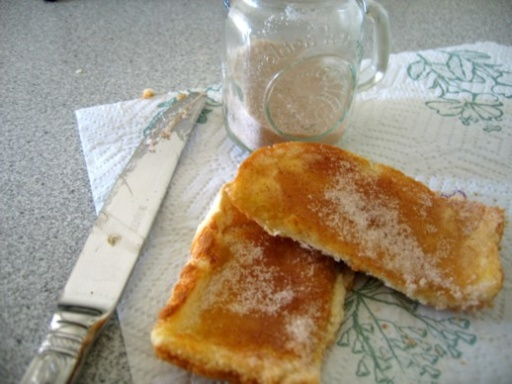

In [67]:
# We load the dataset using HuggingFace datasets. When you run it in a fresh env it will download the data
dataset = load_dataset("EduardoPacheco/FoodSeg103")
# Let's take a look to one of the pics:
example = dataset["train"][2]
image = example["image"]
image

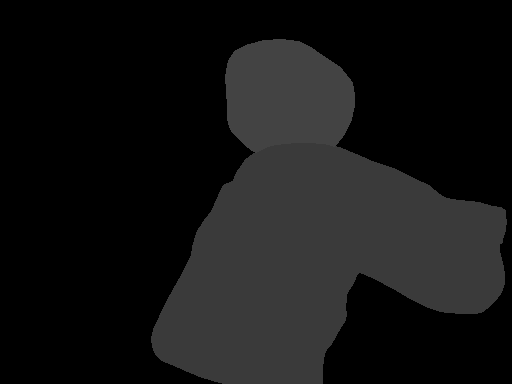

In [68]:
segmentation_map = example["label"]
segmentation_map

In the segmentation map, every pixel is labeled with a certain class. 0 is the "background" class:

In [69]:


segmentation_map = np.array(segmentation_map)
segmentation_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Here is a dictionary with the remaining classes:

In [70]:
id2label = {
    0: "background",
    1: "candy",
    2: "egg tart",
    3: "french fries",
    4: "chocolate",
    5: "biscuit",
    6: "popcorn",
    7: "pudding",
    8: "ice cream",
    9: "cheese butter",
    10: "cake",
    11: "wine",
    12: "milkshake",
    13: "coffee",
    14: "juice",
    15: "milk",
    16: "tea",
    17: "almond",
    18: "red beans",
    19: "cashew",
    20: "dried cranberries",
    21: "soy",
    22: "walnut",
    23: "peanut",
    24: "egg",
    25: "apple",
    26: "date",
    27: "apricot",
    28: "avocado",
    29: "banana",
    30: "strawberry",
    31: "cherry",
    32: "blueberry",
    33: "raspberry",
    34: "mango",
    35: "olives",
    36: "peach",
    37: "lemon",
    38: "pear",
    39: "fig",
    40: "pineapple",
    41: "grape",
    42: "kiwi",
    43: "melon",
    44: "orange",
    45: "watermelon",
    46: "steak",
    47: "pork",
    48: "chicken duck",
    49: "sausage",
    50: "fried meat",
    51: "lamb",
    52: "sauce",
    53: "crab",
    54: "fish",
    55: "shellfish",
    56: "shrimp",
    57: "soup",
    58: "bread",
    59: "corn",
    60: "hamburg",
    61: "pizza",
    62: "hanamaki baozi",
    63: "wonton dumplings",
    64: "pasta",
    65: "noodles",
    66: "rice",
    67: "pie",
    68: "tofu",
    69: "eggplant",
    70: "potato",
    71: "garlic",
    72: "cauliflower",
    73: "tomato",
    74: "kelp",
    75: "seaweed",
    76: "spring onion",
    77: "rape",
    78: "ginger",
    79: "okra",
    80: "lettuce",
    81: "pumpkin",
    82: "cucumber",
    83: "white radish",
    84: "carrot",
    85: "asparagus",
    86: "bamboo shoots",
    87: "broccoli",
    88: "celery stick",
    89: "cilantro mint",
    90: "snow peas",
    91: "cabbage",
    92: "bean sprouts",
    93: "onion",
    94: "pepper",
    95: "green beans",
    96: "French beans",
    97: "king oyster mushroom",
    98: "shiitake",
    99: "enoki mushroom",
    100: "oyster mushroom",
    101: "white button mushroom",
    102: "salad",
    103: "other ingredients"
}

In [ ]:
# TODO: implement the segmentation model using the attention maps of the CLS token

# Problem 4: Speech embeddings [3.5p]

Speech is a signal with structure at multiple levels. At the lowest level, it's a high-frequency time series of air-pressure variations. But we use speech to communicate language, therefore underlying this high-frequency continuous data, there is low-frequency discrete linguistic structure. This underlying discrete sequences are usually what we are interested in for speech applications. For instance, in speech recognition we aim to extract the words that were spoken (with words being sequences of discrete symbols like phonemes, letters, or subwords).

We have seen that self-supervised learning excels at extracting meaningful high-level structured (in the sense of nicely clustered embeddings) information from high-dimensional unstructured inputs. In text, it captures the meaning of words, sentences, and so on, up to the scale of large complex documents. In images, it learns to locate and categorize objects. When applied to speech, self-supervised trained models can learn to extract the underlying linguistic information.

In this problem we will use [HuBERT](https://arxiv.org/abs/2106.07447) to extract speech representations. HuBERT is an adaptation of the BERT algorithm for text that you used in Problem 2, and which we discussed in the lecture (Slide 23), to speech. Here an illustration of the HuBERT algorithm:

![image.png](https://drive.google.com/uc?id=1GjzUc3uQpgVLvCJMuhHvNC8W2Oc8i7a0)
*Taken from the [HuBERT paper](https://arxiv.org/abs/2106.07447)*

It consists roughly of 4 steps:

1. Extract a (downsampled) sequence of frame representations ($x$ in the figure) by applying a CNN to the raw speech.
2. Produce pseudo-labels for each frame in the sequence by clustering the MFCC features (a frequency decomposition of the speech frame) using a K-Means algorithm. The cluster ids are the pseudo-labels ($z$ in the figure).
3. Mask segments of the sequence of frames with a special `[MSK]` token, and pass the masked sequence through a transformer.
4. Use the output of the transformer to predict the pseudo-labels of the masked frames.

After training, the representations obtained from the transformer blocks roughly encode the linguistic content (i.e. the underlying "text") of the speech signal. This means for instance that we expect to see clusters corresponding to phoneme classes in the embedding space.

## Self-supervised trained models as tokenizers

Recall from our previous lab that we defined character/subword/word tokenization as the assignment of integer numbers to characters/subwords/words. After tokenization, we were able to apply a language model (GPT) in order to generate text.

The fact that self-supervised trained models learn to extract representations that are amenable to clusterization (e.g. we obtain clusters in embedding space that correspond to object categories in images, or phonemes in speech) allows us to use them as tokenizers. We simply need to apply a clustering algorithm to the embeddings, and use the cluster ids as tokens. Afterwards, we can use a language model like GPT to learn a generative model!

### Tasks

In this problem, you will extract speech representations using a pre-trained HuBERT model, clusterize them to obtain speech tokens using a pre-trained K-Means model, train a small GPT model to learn to generate speech tokens, and transform back the generated speech tokens to audio, so that you get to listen to your talking GPT!

It's worth to mention that [a very similar tokenization approach can be applied to images](https://arxiv.org/pdf/2310.05737.pdf). This is a very active research area and it is used in models like ChatGPT to extend its abilities beyond text by allowing them to see (receive images as input tokens) and hear (receive speech as input tokens).

1. **(1 pt)** Implement the forward pass of the `SpeechTokenizer` and tokenize the speech data in the folder `ls1h`. In the forward pass you simply have to assign return the id of the nearest cluster for each speech representation.
2. **(1 pt)** We would like to validate that the speech tokens that our model has discovered roughly correspond to the linguistic content of the speech signal. In this task you will compare the co-occurence of speech tokens learned by our model and phones (sort of like letters, but for speech). The file `ls1h/phones.txt` contains phone labels for each speech frame (i.e. each representation extracted by HuBERT). Find a way to visualize $p(\text{phone}|\text{speech token})$, i.e. the co-occurence of phones and learned speech tokens. I leave an example of a co-occurence heatmap, but you can come up with other ways of visualizing it. Analyze what you observe.
3. **(1 pt)** Use your tokenized speech data to train a language model (you can use your GPT implementation from the previous lab or whichever model you prefer).

    Normally we would train these models on hundreds or thousands of hours of audio, but this would take too long, so we are using just 1 hour of speech. Since our data is very little, we will likely be overfitting to it, so don't bother using a validation split. We will validate the results of our model by listening to it.
    
    **_Note_**: As a preprocessing step, and in order to shorten the sequences and remove redundant information, collapse adjacent repetitions of tokens in your dataset before training the language model. E.g. if after encoding a speech sample the sequence of tokens is `[42, 42, 33, 1, 13, 11, 33, 33]`, you should remove contiguous repetitions so that it becomes `[42, 33, 1, 13, 11, 33]`. You can use `torch.unique_consecutive` for this. [This has been show to improve results](https://arxiv.org/abs/2102.01192) by removing the need of modeling the duration of the tokens, allowing the model to focus on the content.
4. **(0.5 pt)** Generate speech tokens using your trained GPT model and convert them back to audio using the `token2speech` pre-trained model. You can use `IPython.display.Audio` to listen to the generated audio in your notebook. I attach to this file a sample of what you can expect of a trained model with the default hyperparameters.

First we download the required packages. We will use [fairseq](https://github.com/facebookresearch/fairseq) from Meta which implements the HuBERT model. **You only need to do this when you start on a fresh environment. After a restart of the kernel is not needed**.

In [ ]:
# This might take a few minutes
!git clone https://github.com/facebookresearch/fairseq
!cd fairseq && pip install ./

Cloning into 'fairseq'...
remote: Enumerating objects: 35073, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 35073 (delta 0), reused 3 (delta 0), pack-reused 35061
Receiving objects: 100% (35073/35073), 25.12 MiB | 23.07 MiB/s, done.
Resolving deltas: 100% (25481/25481), done.
Processing /content/fairseq
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fairseq: filename=fairseq-0.12.2-cp310-cp310-linux_x86_64.whl size=19953230 sha256=a36abee8ea95b5791

We download the pretrained models

In [ ]:
!wget https://dl.fbaipublicfiles.com/textless_nlp/twist/speech_tokenizer/mhubert_base_25hz_cp_mls_cv_sp_fisher.pt
!wget https://dl.fbaipublicfiles.com/textless_nlp/twist/speech_tokenizer/mhubert_base_25hz_cp_mls_cv_sp_fisher_L11_km500.bin

--2024-01-27 23:17:47--  https://dl.fbaipublicfiles.com/textless_nlp/twist/speech_tokenizer/mhubert_base_25hz_cp_mls_cv_sp_fisher.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.33, 13.227.219.59, 13.227.219.10, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1149811398 (1.1G) [binary/octet-stream]
Saving to: ‘mhubert_base_25hz_cp_mls_cv_sp_fisher.pt’

mhubert_base_25hz_c 100%[===================>]   1.07G  10.3MB/s    in 37s     

2024-01-27 23:18:24 (29.3 MB/s) - ‘mhubert_base_25hz_cp_mls_cv_sp_fisher.pt’ saved [1149811398/1149811398]

--2024-01-27 23:18:24--  https://dl.fbaipublicfiles.com/textless_nlp/twist/speech_tokenizer/mhubert_base_25hz_cp_mls_cv_sp_fisher_L11_km500.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.33, 13.227.219.59, 13.227.219.70, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.

We will also use the [textless](https://github.com/facebookresearch/textlesslib/) library that implements the model that will transform our speech tokens back to audio.

_**IMPORTANT:** it will give you some warnings abour unmet dependencies, but you can ignore them. If when importing_ `textless` _below you get a `ModuleNotFoundError`, just restart the session after having installed the library. Afterwards the import should work.

In [ ]:
!git clone https://github.com/facebookresearch/textlesslib
!cd textlesslib && pip install -e . --no-deps
!pip install unidecode

Cloning into 'textlesslib'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (206/206), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 287 (delta 111), reused 166 (delta 90), pack-reused 81
Receiving objects: 100% (287/287), 3.04 MiB | 13.65 MiB/s, done.
Resolving deltas: 100% (123/123), done.
Obtaining file:///content/textlesslib
  Preparing metadata (setup.py) ... done
  Running setup.py develop for textless
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textless 0.1.0 requires AMFM_decompy, which is not installed.
textless 0.1.0 requires npy-append-array, which is not installed.
textless 0.1.0 requires numba==0.53.0, but you have numba 0.58.1 which is incompatible.
textless 0.1.0 requires numpy==1.22.0, but you have numpy 1.23.5 

We download the speech data

In [ ]:
![ -e  ls1h.zip ] || gdown 'https://drive.google.com/uc?id=1lCtD7xJNECUSQr14janqNcxS39pssqPn' -O ls1h.zip
![ -d ls1h ] || unzip ls1h.zip

Downloading...
From: https://drive.google.com/uc?id=1lCtD7xJNECUSQr14janqNcxS39pssqPn
To: /content/ls1h.zip
100% 92.7M/92.7M [00:00<00:00, 107MB/s]
Archive:  ls1h.zip
   creating: ls1h/
  inflating: ls1h/1088-129236-0012.wav  
  inflating: ls1h/1088-129236-0027.wav  
  inflating: ls1h/1088-129236-0024.wav  
  inflating: ls1h/1088-129236-0021.wav  
  inflating: ls1h/1088-129236-0020.wav  
  inflating: ls1h/1088-129236-0004.wav  
  inflating: ls1h/1088-129236-0001.wav  
  inflating: ls1h/1088-129236-0013.wav  
  inflating: ls1h/1088-129236-0015.wav  
  inflating: ls1h/1088-129236-0014.wav  
  inflating: ls1h/1088-129236-0003.wav  
  inflating: ls1h/1088-129236-0026.wav  
  inflating: ls1h/1088-129236-0025.wav  
  inflating: ls1h/1088-129236-0017.wav  
  inflating: ls1h/1088-129236-0002.wav  
  inflating: ls1h/1088-129236-0010.wav  
  inflating: ls1h/1088-129236-0008.wav  
  inflating: ls1h/1088-129236-0006.wav  
  inflating: ls1h/1088-129236-0007.wav  
  inflating: ls1h/1088-129236-0011.

We import the necessary modules for this problem

In [ ]:
import fairseq
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
import joblib
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from textless.vocoders.hifigan.vocoder import CodeHiFiGANVocoder
import IPython
device = "cuda"

ModuleNotFoundError: No module named 'textless'

## Problem 4, Task 1: Implement the forward pass of the speech tokenizer and tokenize the speech data

In [ ]:
class SpeechTokenizer(nn.Module):
    def __init__(self, feat_extractor_path, layer, km_path):
        super().__init__()
        # Loading HuBERT model
        (
            model,
            cfg,
            task,
        ) = fairseq.checkpoint_utils.load_model_ensemble_and_task([feat_extractor_path])
        self.model = model[0] # HuBERT model
        self.task = task
        self.layer = layer # Layer from which we will extract features
        # Loading trained K-Means vector quantizer
        km_model = joblib.load(km_path)
        self.C = torch.from_numpy(km_model.cluster_centers_.transpose())  # Centroids of the K-Means Clusters

    def wav2code(self, wav): # takes as input the speech waveform
        with torch.no_grad():
            if self.task.cfg.normalize:
                wav = F.layer_norm(wav, wav.shape)
            wav = wav.view(1, -1)
            feat, _ = self.model.extract_features(
                source=wav,
                padding_mask=None,
                mask=False,
                output_layer=self.layer,
            )
        # speech embeddings of dimensions sequence length x 768 (HuBERT embedding dim)
        # note that the sequence length is shorter than the waveform length, because the CNN encoder in HuBERT
        # downsamples the waveform
        feat = feat.squeeze(0)
        codes = torch.argmin(torch.cdist(feat, self.C.transpose(0, 1)), dim=1) # Cluster ids for each embedding
        return codes

speech_tokenizer = SpeechTokenizer("mhubert_base_25hz_cp_mls_cv_sp_fisher.pt", # Name of the HuBERT model you downloaded
                                   11, # The K-Means model that we use was trained on embeddings from layer 11 of HuBERT
                                   "mhubert_base_25hz_cp_mls_cv_sp_fisher_L11_km500.bin") # Name of the K-Means model you downloaded
speech_tokenizer.to(device)

SpeechTokenizer(
  (model): HubertModel(
    (feature_extractor): ConvFeatureExtractionModel(
      (conv_layers): ModuleList(
        (0): Sequential(
          (0): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): Fp32GroupNorm(512, 512, eps=1e-05, affine=True)
          (3): GELU(approximate='none')
        )
        (1-4): 4 x Sequential(
          (0): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): GELU(approximate='none')
        )
        (5-7): 3 x Sequential(
          (0): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): GELU(approximate='none')
        )
      )
    )
    (post_extract_proj): Linear(in_features=512, out_features=768, bias=True)
    (dropout_input): Dropout(p=0.1, inplace=False)
    (dropout_features): Dropout(p=0.1, inplace=False)
    (encoder): Tr

In the next cell we will tokenize our speech data and save our speech tokens to a txt file, in which each line starts with the filename, and is followed by the sequence of codes, all separated by spaces. For example:

```
1088-129236-0027 99 32 3 49 49 7 391 227 227 399 7 70 431 ...
1088-129236-0024 28 7 257 257 257 7 118 118 35 466 466 150 ...
1088-129236-0021 361 209 209 209 257 257 7 118 70 431 423 ...
```

In [ ]:
directory_path = "ls1h"
with open("ls1h/codes.txt", "w") as f: # We will save our speech tokens as a txt file
    for filename in os.listdir(directory_path): # We check each file in the directory
        if filename.endswith('.wav'): # If it has wav extension we process it
            fname = os.path.join(directory_path, filename) # path to the wav file
            fid = fname.split('/')[1][:-4] # file name
            wav, sr = torchaudio.load(fname) # We read the audio
            codes = speech_tokenizer.wav2code(wav.to(device)).cpu().tolist() # Pass it through our speech tokenizer
            f.write(f"{fid} " + " ".join(map(str, codes)) + "\n") # Write the codes to the txt file

RuntimeError: X1 and X2 must have the same device type. X1: cuda X2: cpu

## Problem 4, Task 2: Visualize the co-ocurrence of phones and learned speech tokens

Similar to our `codes.txt` created above, with the labs file I included a `phones.txt` file, which includes for each frame (i.e. each HuBERT representation) the label of the corresponding phone being uttered at that point in time. The format is the same as the `codes.txt` file, e.g.:

```
1088-129236-0029 0 0 0 0 0 0 0 0 0 0 0 29 31 30 30 30 30 10 10 6 ...
26-495-0034 0 0 0 0 0 4 4 4 12 40 5 5 4 4 39 39 39 28 28 28 28 28 ...
26-495-0035 0 0 0 0 0 0 0 0 0 0 26 26 26 37 37 5 5 14 14 15 9 37 ...
```
But this time the numbers correspond not to speech tokens, but to human annotated phones. We use a vocabulary of 41 phones, so the numbers range from 0 to 40.

Here there is a dict that maps the phone numbers to the corresponding phone in the [ARPABet](https://en.wikipedia.org/wiki/ARPABET) notation:

In [ ]:
arpabet_phones = [
    'SIL','SPN','S','UW','T','N','K','Y','Z','AO','AY','SH','W','NG','EY',
    'B','CH','OY','JH','D','ZH','G','UH','F','V','ER','AA','IH',
    'M','DH','L','AH','P','OW','AW','HH','AE','R','TH','IY','EH'
] # SIL corresponds to silence, and SPN to non-sponen noise. The rest you can sort of read them like they are written
# But if you really want to know how they sound, you can check the wikipedia article: https://en.wikipedia.org/wiki/ARPABET
codes2phones = {i: j for (i, j) in enumerate(arpabet_phones)}

In this task you should somehow visualize how correlated are our speech tokens learned in an unsupervised fashion (self-supervision + K-Means quantization) with the phones (human-defined speech tokens) being uttered. Below I show one possible way to do it. Analyze what you observe.

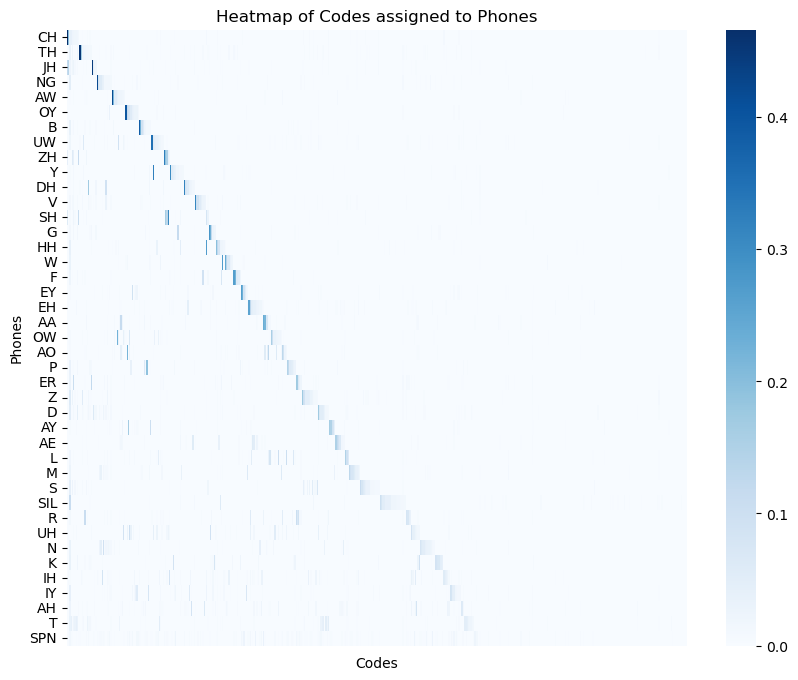

In [ ]:
# TODO, somehow visualize the p(phone|speech token). Example here shown

## Problem 4, Task 3: Train a language model on your speech tokens

In [ ]:
# TODO: train a language model on your dataset of speech tokens. You can use your GPT model from the previous lab.

## Problem 4, Task 4: Generate speech using the trained language model

In [ ]:
# TODO: generate speech using your language model and listen to the results

# We create an instance of the pre-trained model that will transform our speech tokens into a speech waveform
vocoder = CodeHiFiGANVocoder.by_name(
    dense_model_name = "mhubert-base-25hz",
    quantizer_model_name = "kmeans",
    vocab_size = 500
).eval().to(device)
# Generate a sequence of speech tokens using your trained language model. You can start the sequence with speech
# tokens from the training dataset
generated_speech_tokens = TODO
# Transform the speech tokens into audio
generated_wav = vocoder(generated_speech_tokens, dur_prediction=True)
# Display a player where you can listen to the generated speech
IPython.display.Audio(data=gen_wav.squeeze().cpu().numpy(), rate=16000)